In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib as mpl
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen, add_image
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
from urllib.request import urlopen
import os
from statistics import mode


# Print the modified DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

green = '#69f900'
red = '#ff4b44'
blue = '#00a0de'
violet = '#a369ff'
bg_color= '#f5f5f5'
line_color= '#000000'
col1 = '#ff4b44'
col2 = '#00a0de'

In [2]:
font_path = "C:\Fonts\LaLiga2023Bold.otf"
custom_font = FontProperties(fname=font_path)
font_path_thin = "C:\Fonts\LaLiga2023Thin.otf"
custom_font_thin = FontProperties(fname=font_path_thin)

In [3]:
df = pd.read_csv(r"D:\FData\Tukish_League_2024_25\super_lig_24_25_event_data_till_gw12.csv")

In [3]:
df = pd.read_csv(r"D:\FData\LaLiga_2024_25\laliga_half_season.csv")

In [8]:
df = pd.read_csv(r"D:\FData\LaLiga_2023-24\GW1_to_GW_38combinded.csv")

# Offside Trap

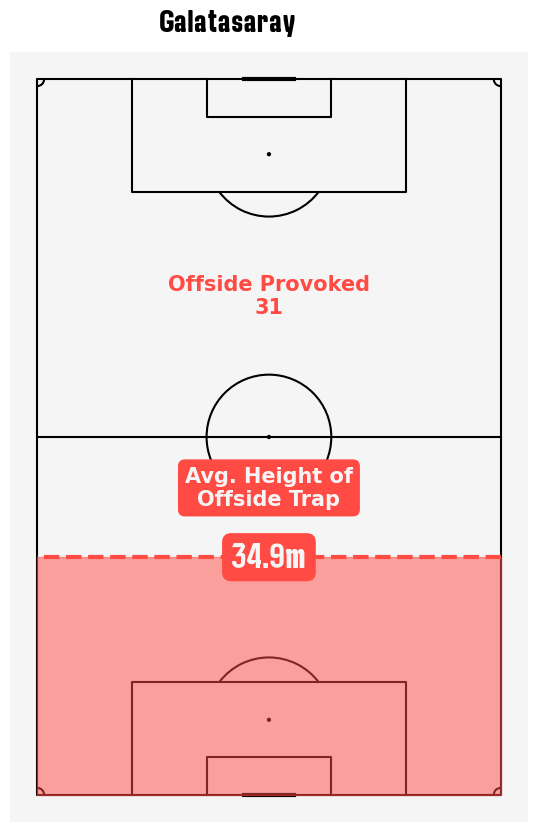

In [10]:
# Function to calculate avg_x for a given team
def calculate_avg_x(team_name):
    dfteam = df[df['teamName'] == team_name]
    cb_df = dfteam[(dfteam['type'] == 'OffsideProvoked')]
    return cb_df['x'].median()

# Function to plot the defensive line for a team
def plot_def_line(ax, team_name):
    dfteam = df[df['teamName'] == team_name]
    cb_df = dfteam[(dfteam['type'] == 'OffsideProvoked')]
    offpro = len(cb_df)
    avg_x = cb_df['x'].median()
    pitch = VerticalPitch(pitch_type='uefa', pitch_color=bg_color, line_color=line_color, linewidth=1.5, corner_arcs=True)
    pitch.draw(ax=ax)
    
    ax.hlines(avg_x, xmin=0, xmax=68, color=col1, linewidth=3, linestyle='--')
    # ax.hlines(cb_df.x, xmin=0, xmax=68, color=col2, linewidth=1, linestyle='--')
    ax.text(34, avg_x, f'{avg_x:.1f}m', color=bg_color, fontsize=20, fontweight='bold', ha='center', va='center',
            bbox=dict(facecolor=col1, edgecolor=col1, boxstyle='round,pad=0.3'), fontproperties=custom_font)
    
    # ax.hlines(off_x, xmin=0, xmax=68, color=col1, linestyle='--', label='Offensive Actions')
    ax.text(34, 70, f'Offside Provoked\n{offpro}', color=col1, fontsize=15, fontweight='bold', ha='center', va='bottom',
            # bbox=dict(facecolor=col1, edgecolor=col1, boxstyle='round,pad=0.3')
           )
    
    # ax.hlines(def_x, xmin=0, xmax=68, color=col2, linestyle='--', label='Defensive Actions')
    ax.text(34, avg_x + 7, f'Avg. Height of\nOffside Trap', color=bg_color, fontsize=15, fontweight='bold', ha='center', va='bottom',
            bbox=dict(facecolor=col1, edgecolor=col1, boxstyle='round,pad=0.3'))

    fill_x = [0,68,68,0]
    fill_y = [0,0,avg_x,avg_x]
    ax.fill(fill_x, fill_y, color=col1, alpha=0.5)
    
    ax.text(50, 112, team_name, fontsize=18, fontweight='bold', fontproperties=custom_font)
    # IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    # image = Image.open(urlopen(IMAGE_URL))
    # ax_image = pitch.inset_image(114, 60, image, height=12, ax=ax)

    # ax.legend(loc='upper right')

fig,ax=plt.subplots(figsize=(10,10))
plot_def_line(ax, 'Galatasaray')

In [54]:
# def plot_def_line(ax, team_name):
#     dfteam = df[df['teamName'] == team_name]
#     cb_df = dfteam[(dfteam['type'] == 'OffsideProvoked')]
#     offpro = len(cb_df)
#     avg_x = cb_df['x'].median()
#     pitch = VerticalPitch(pitch_type='uefa', pitch_color=bg_color, linewidth=1.5, corner_arcs=True)
#     pitch.draw(ax=ax)
#     ax.set_xlim(68.5, -0.5)
#     ax.set_ylim(-0.5, 105.5)
    
#     ax.hlines(avg_x, xmin=0, xmax=68, color=col1, linewidth=3, linestyle='--')
#     # ax.hlines(cb_df.x, xmin=0, xmax=68, color=col2, linewidth=1, linestyle='--')
#     ax.text(34, avg_x, f'{avg_x:.1f}m', color=bg_color, fontsize=20, fontweight='bold', ha='center', va='center',
#             bbox=dict(facecolor=col1, edgecolor=col1, boxstyle='round,pad=0.3'), fontproperties=custom_font)
    
#     # # ax.hlines(off_x, xmin=0, xmax=68, color=col1, linestyle='--', label='Offensive Actions')
#     # ax.text(34, 70, f'Offside Provoked\n{offpro}', color=col1, fontsize=15, fontweight='bold', ha='center', va='bottom',
#     #         # bbox=dict(facecolor=col1, edgecolor=col1, boxstyle='round,pad=0.3')
#     #        )
    
#     # # ax.hlines(def_x, xmin=0, xmax=68, color=col2, linestyle='--', label='Defensive Actions')
#     # ax.text(34, avg_x + 7, f'Avg. Height of\nOffside Trap', color=bg_color, fontsize=15, fontweight='bold', ha='center', va='bottom',
#     #         bbox=dict(facecolor=col1, edgecolor=col1, boxstyle='round,pad=0.3'))

#     # fill_x = [0,68,68,0]
#     # fill_y = [0,0,avg_x,avg_x]
#     # ax.fill(fill_x, fill_y, color=col1, alpha=0.5)
#     pitch.scatter(cb_df.x, cb_df.y, s=100, color='None', lw=1.5, ec=col1, ax=ax)
    
#     ax.text(50, 112, team_name, fontsize=18, fontweight='bold', fontproperties=custom_font)
#     ax.text(50, 108, f'Total Offsides Provoked: {offpro}', fontsize=12, ha='left', va='center', fontproperties=custom_font_thin)
#     IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
#     image = Image.open(urlopen(IMAGE_URL))
#     ax_image = pitch.inset_image(114, 60, image, height=12, ax=ax)

#     # ax.legend(loc='upper right')

# fig,ax=plt.subplots(figsize=(10,10))
# plot_def_line(ax, 'Tottenham')

In [55]:
col1 = '#400f66'

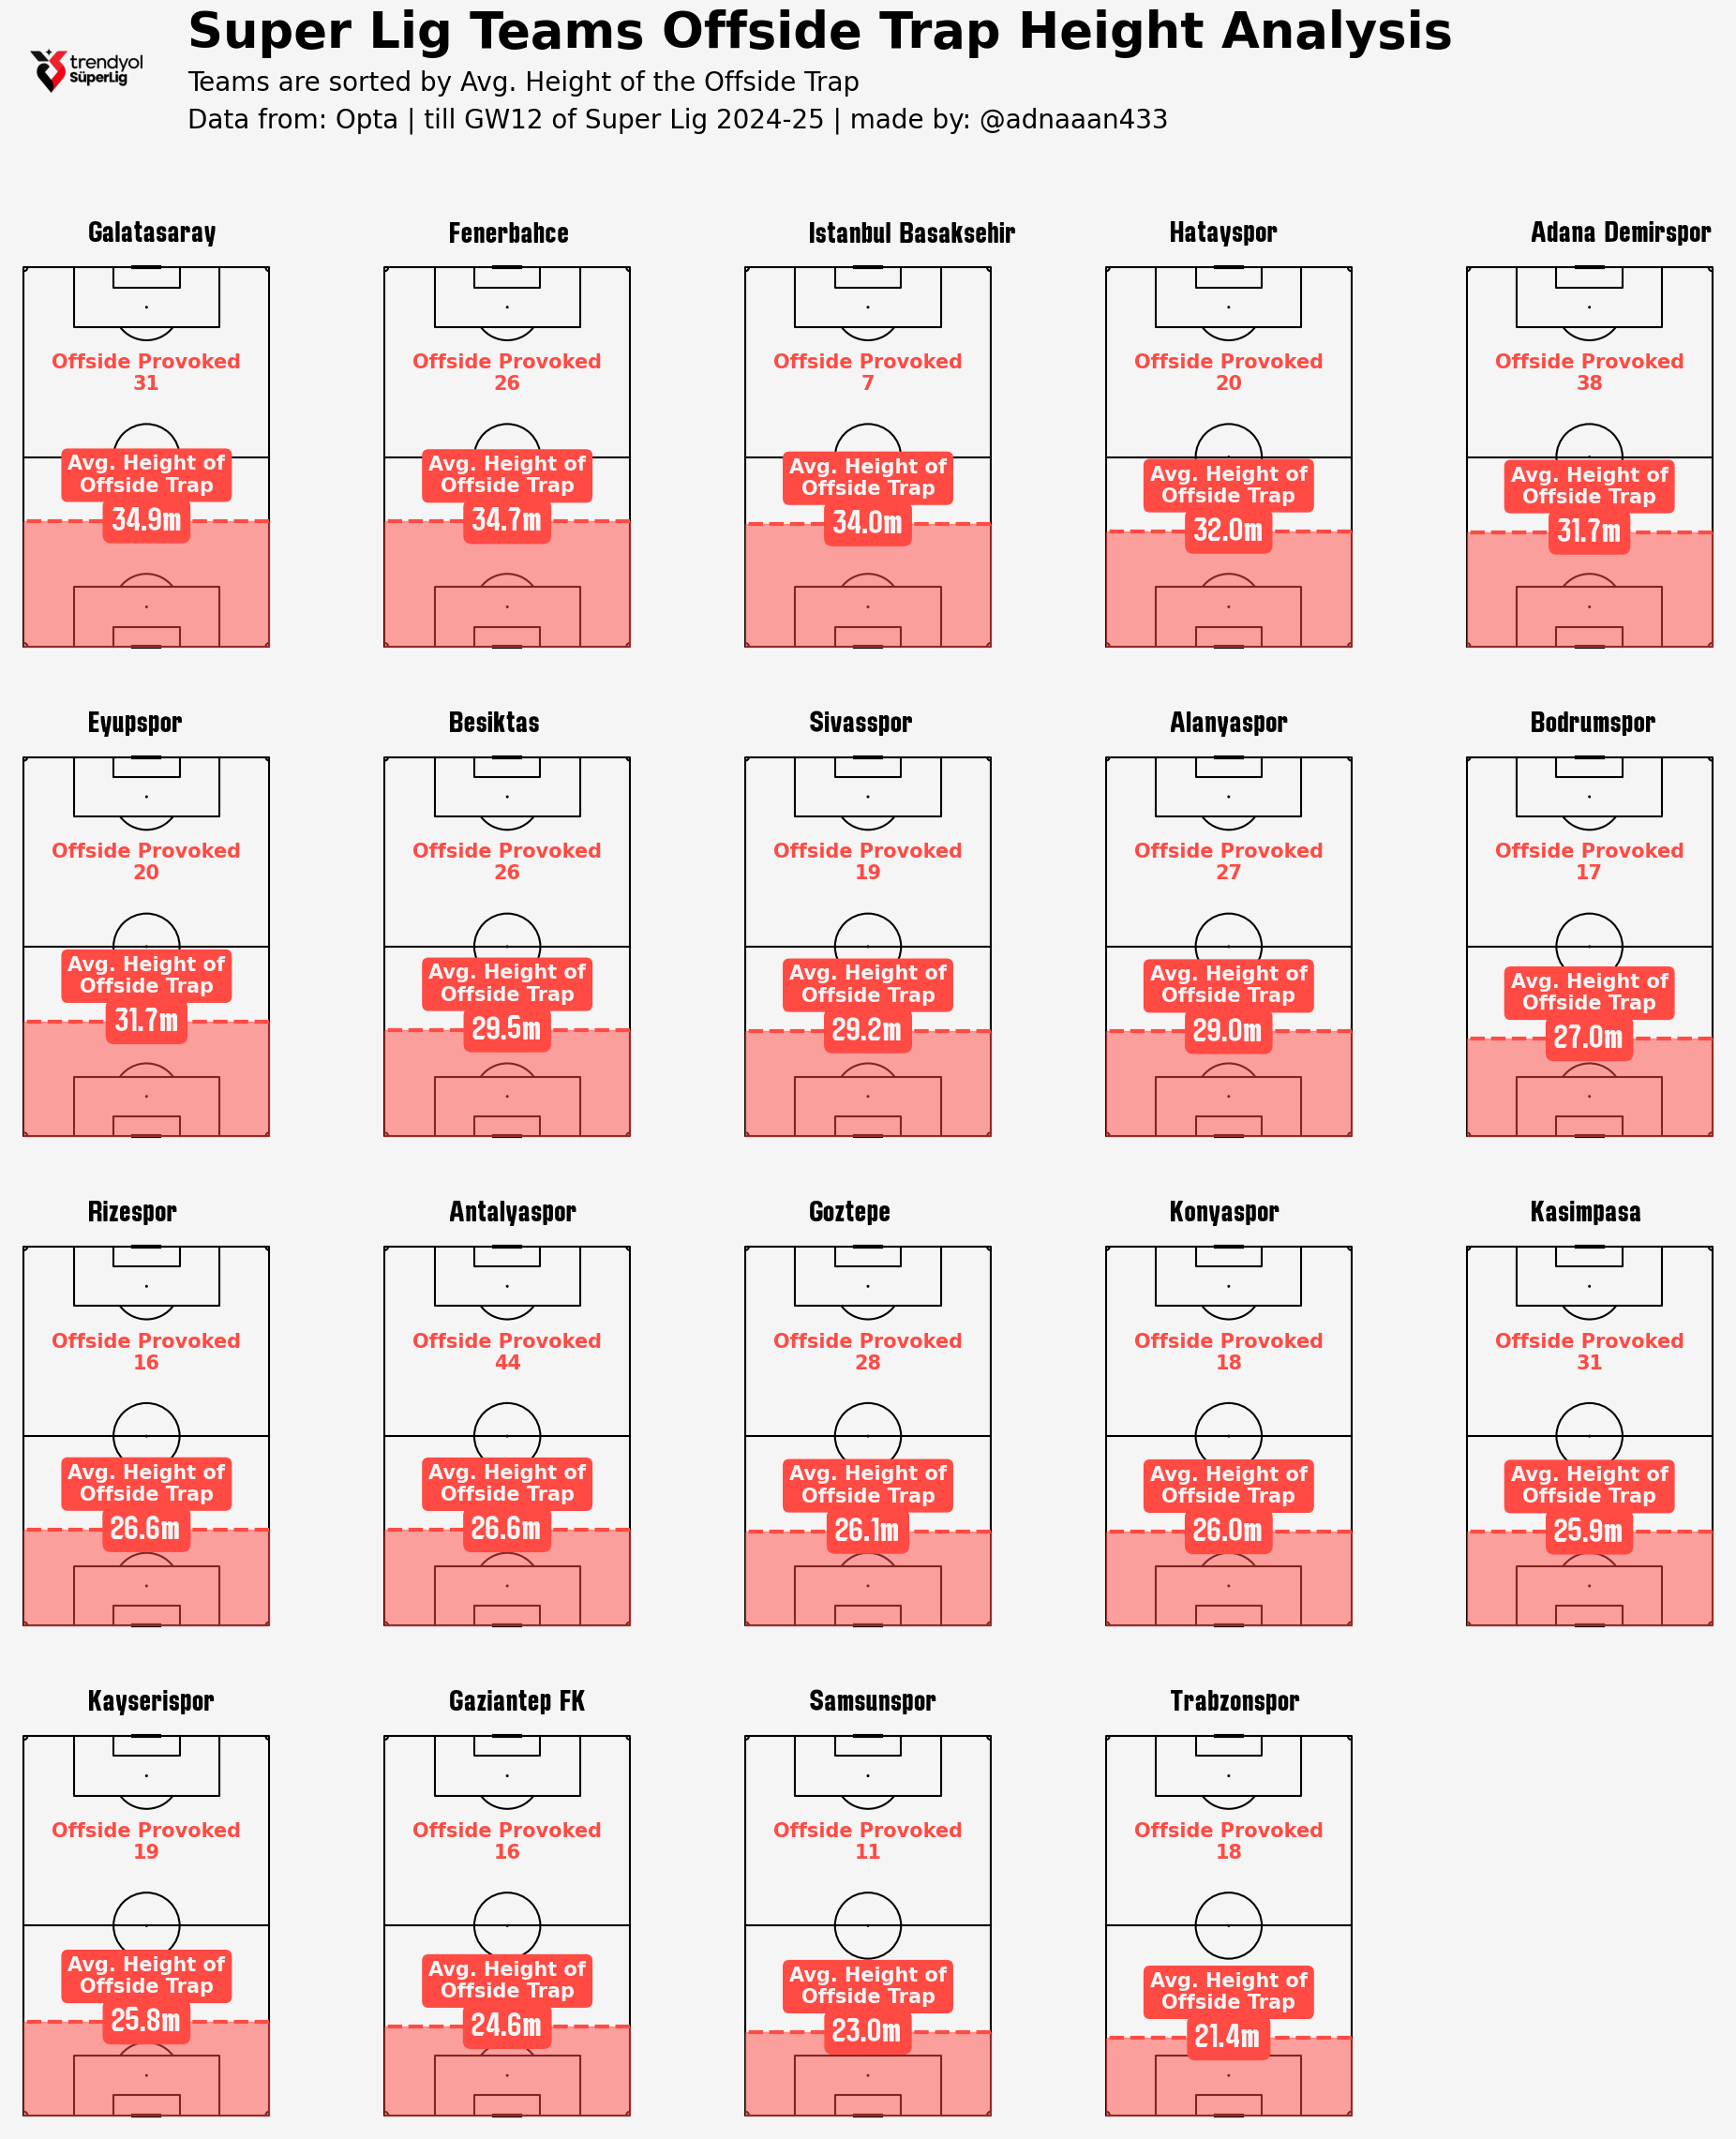

In [12]:
# List of team names
team_names = df.teamName.unique()

# Create a DataFrame with team names and their avg_x values
team_avg_x = pd.DataFrame({'teamName': team_names})
team_avg_x['avg_x'] = team_avg_x['teamName'].apply(calculate_avg_x)

# Sort the teams by avg_x value
team_avg_x_sorted = team_avg_x.sort_values(by='avg_x', ascending=False).dropna().reset_index(drop=True)

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(24, 26), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_avg_x_sorted.itertuples()):
    team_name = row.teamName
    avg_x = row.avg_x
    plot_def_line(axes[i], team_name)
# plot_blank(axes[18])
plot_blank(axes[19])

fig.text(0.21, 0.98, 'Super Lig Teams Offside Trap Height Analysis', fontsize=38, fontweight='bold', ha='left', va='top')
fig.text(0.21, 0.955, "Teams are sorted by Avg. Height of the Offside Trap",
         fontsize=20, ha='left', va='top')
# fig_text(0.21, 0.94, "<Avg. Offensive Action Height of CenterBacks> | Overall Avg. Position of CneterBacks | <Avg. Defensive Action Height of CenterBacks>",
#          fontsize=17, ha='left', va='top', ax=fig, highlight_textprops=[{'color':col1}, {'color':col2}]_thin)
fig.text(0.21, 0.94, "Data from: Opta | till GW12 of Super Lig 2024-25 | made by: @adnaaan433",
         fontsize=20, ha='left', va='top')

image_url = 'file:///D:/FData/Leagues_logos/S%C3%BCperLig_Logo.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.14, bottom=0.93, width=0.05, height=0.05)

# Fullbacks

In [71]:
# def calculate_avg_h(team_name):
#     rbdf = df[(df['teamName']==team_name) & (df['position']=='DR') & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
#     lbdf = df[(df['teamName']==team_name) & (df['position']=='DL') & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
#     rwbdf = df[(df['teamName']==team_name) & (df['position']=='DMR') & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
#     lwbdf = df[(df['teamName']==team_name) & (df['position']=='DML') & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
#     right = pd.concat([rbdf, rwbdf])
#     left = pd.concat([lbdf, lwbdf])
#     avg_hr = right['x'].median()
#     avg_hl = left['x'].median()
#     avg_h = (avg_hr+avg_hl)/2
#     return avg_h

# def plot_fullback(ax, team_name):
#     rbdf = df[(df['teamName']==team_name) & (df['position']=='DR') & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
#     lbdf = df[(df['teamName']==team_name) & (df['position']=='DL') & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
#     rwbdf = df[(df['teamName']==team_name) & (df['position']=='DMR') & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
#     lwbdf = df[(df['teamName']==team_name) & (df['position']=='DML') & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
#     right = pd.concat([rbdf, rwbdf])
#     left = pd.concat([lbdf, lwbdf])
#     avg_hr = right['x'].median()
#     avg_hl = left['x'].median()
#     avg_h = (avg_hr+avg_hl)/2
#     avg_wr = right['y'].median()
#     avg_wl = left['y'].median()
#     dist = avg_wl - avg_wr
#     pitch = VerticalPitch(pitch_type='uefa', pitch_color=bg_color, line_color='gray', linewidth=2, corner_arcs=True)
#     pitch.draw(ax=ax)
#     pitch.lines(avg_hr, avg_wr, avg_hl, avg_wl, color=col1, lw=7, ax=ax)
#     pitch.scatter(avg_hr, avg_wr, s=1000, color=col1, edgecolor=bg_color, lw=3, zorder=3, ax=ax)
#     pitch.scatter(avg_hl, avg_wl, s=1000, color=col1, edgecolor=bg_color, lw=3, zorder=3, ax=ax)
#     ax.text(avg_wr, avg_hr-7, 'RB', fontsize=20, ha='center', va='top', fontproperties=custom_font)
#     ax.text(avg_wl, avg_hl-7, 'LB', fontsize=20, ha='center', va='top', fontproperties=custom_font)
#     ax.text(avg_wr, avg_hr+7, f'{avg_hr:.1f}', fontsize=20, ha='center', va='bottom', fontproperties=custom_font)
#     ax.text(avg_wl, avg_hl+7, f'{avg_hl:.1f}', fontsize=20, ha='center', va='bottom', fontproperties=custom_font)
#     ax.text(34, 115, f'Avg. Height: {avg_h:.1f}m', fontsize=15, ha='center', va='bottom', fontproperties=custom_font_thin)
#     ax.text(34, 110, f'Avg. Width: {dist:.1f}m', fontsize=15, ha='center', va='bottom', fontproperties=custom_font_thin)
#     ax.text(34, 120, team_name, fontsize=25, fontweight='bold', fontproperties=custom_font, ha='center', va='bottom')
#     IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
#     image = Image.open(urlopen(IMAGE_URL))
#     ax_image = pitch.inset_image(52.5, 34, image, height=25, alpha=0.5, zorder=1, ax=ax)
    

# # List of team names
# team_names = df.teamName.unique()

# # Create a DataFrame with team names and their avg_h values
# team_avg_h = pd.DataFrame({'teamName': team_names})
# team_avg_h['avg_h'] = team_avg_h['teamName'].apply(calculate_avg_h)
# team_avg_h_sorted = team_avg_h.sort_values(by='avg_h', ascending=False).reset_index(drop=True)
# team_avg_h_sorted

# # Create the figure and axes for a 4x5 grid
# fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(24, 26), facecolor=bg_color)

# # Flatten the axes array to easily loop through it
# axes = axes.ravel()

# # Loop through the sorted team names and corresponding axes
# for i, row in enumerate(team_avg_h_sorted.itertuples()):
#     team_name = row.teamName
#     avg_h = row.avg_h
#     plot_fullback(axes[i], team_name)

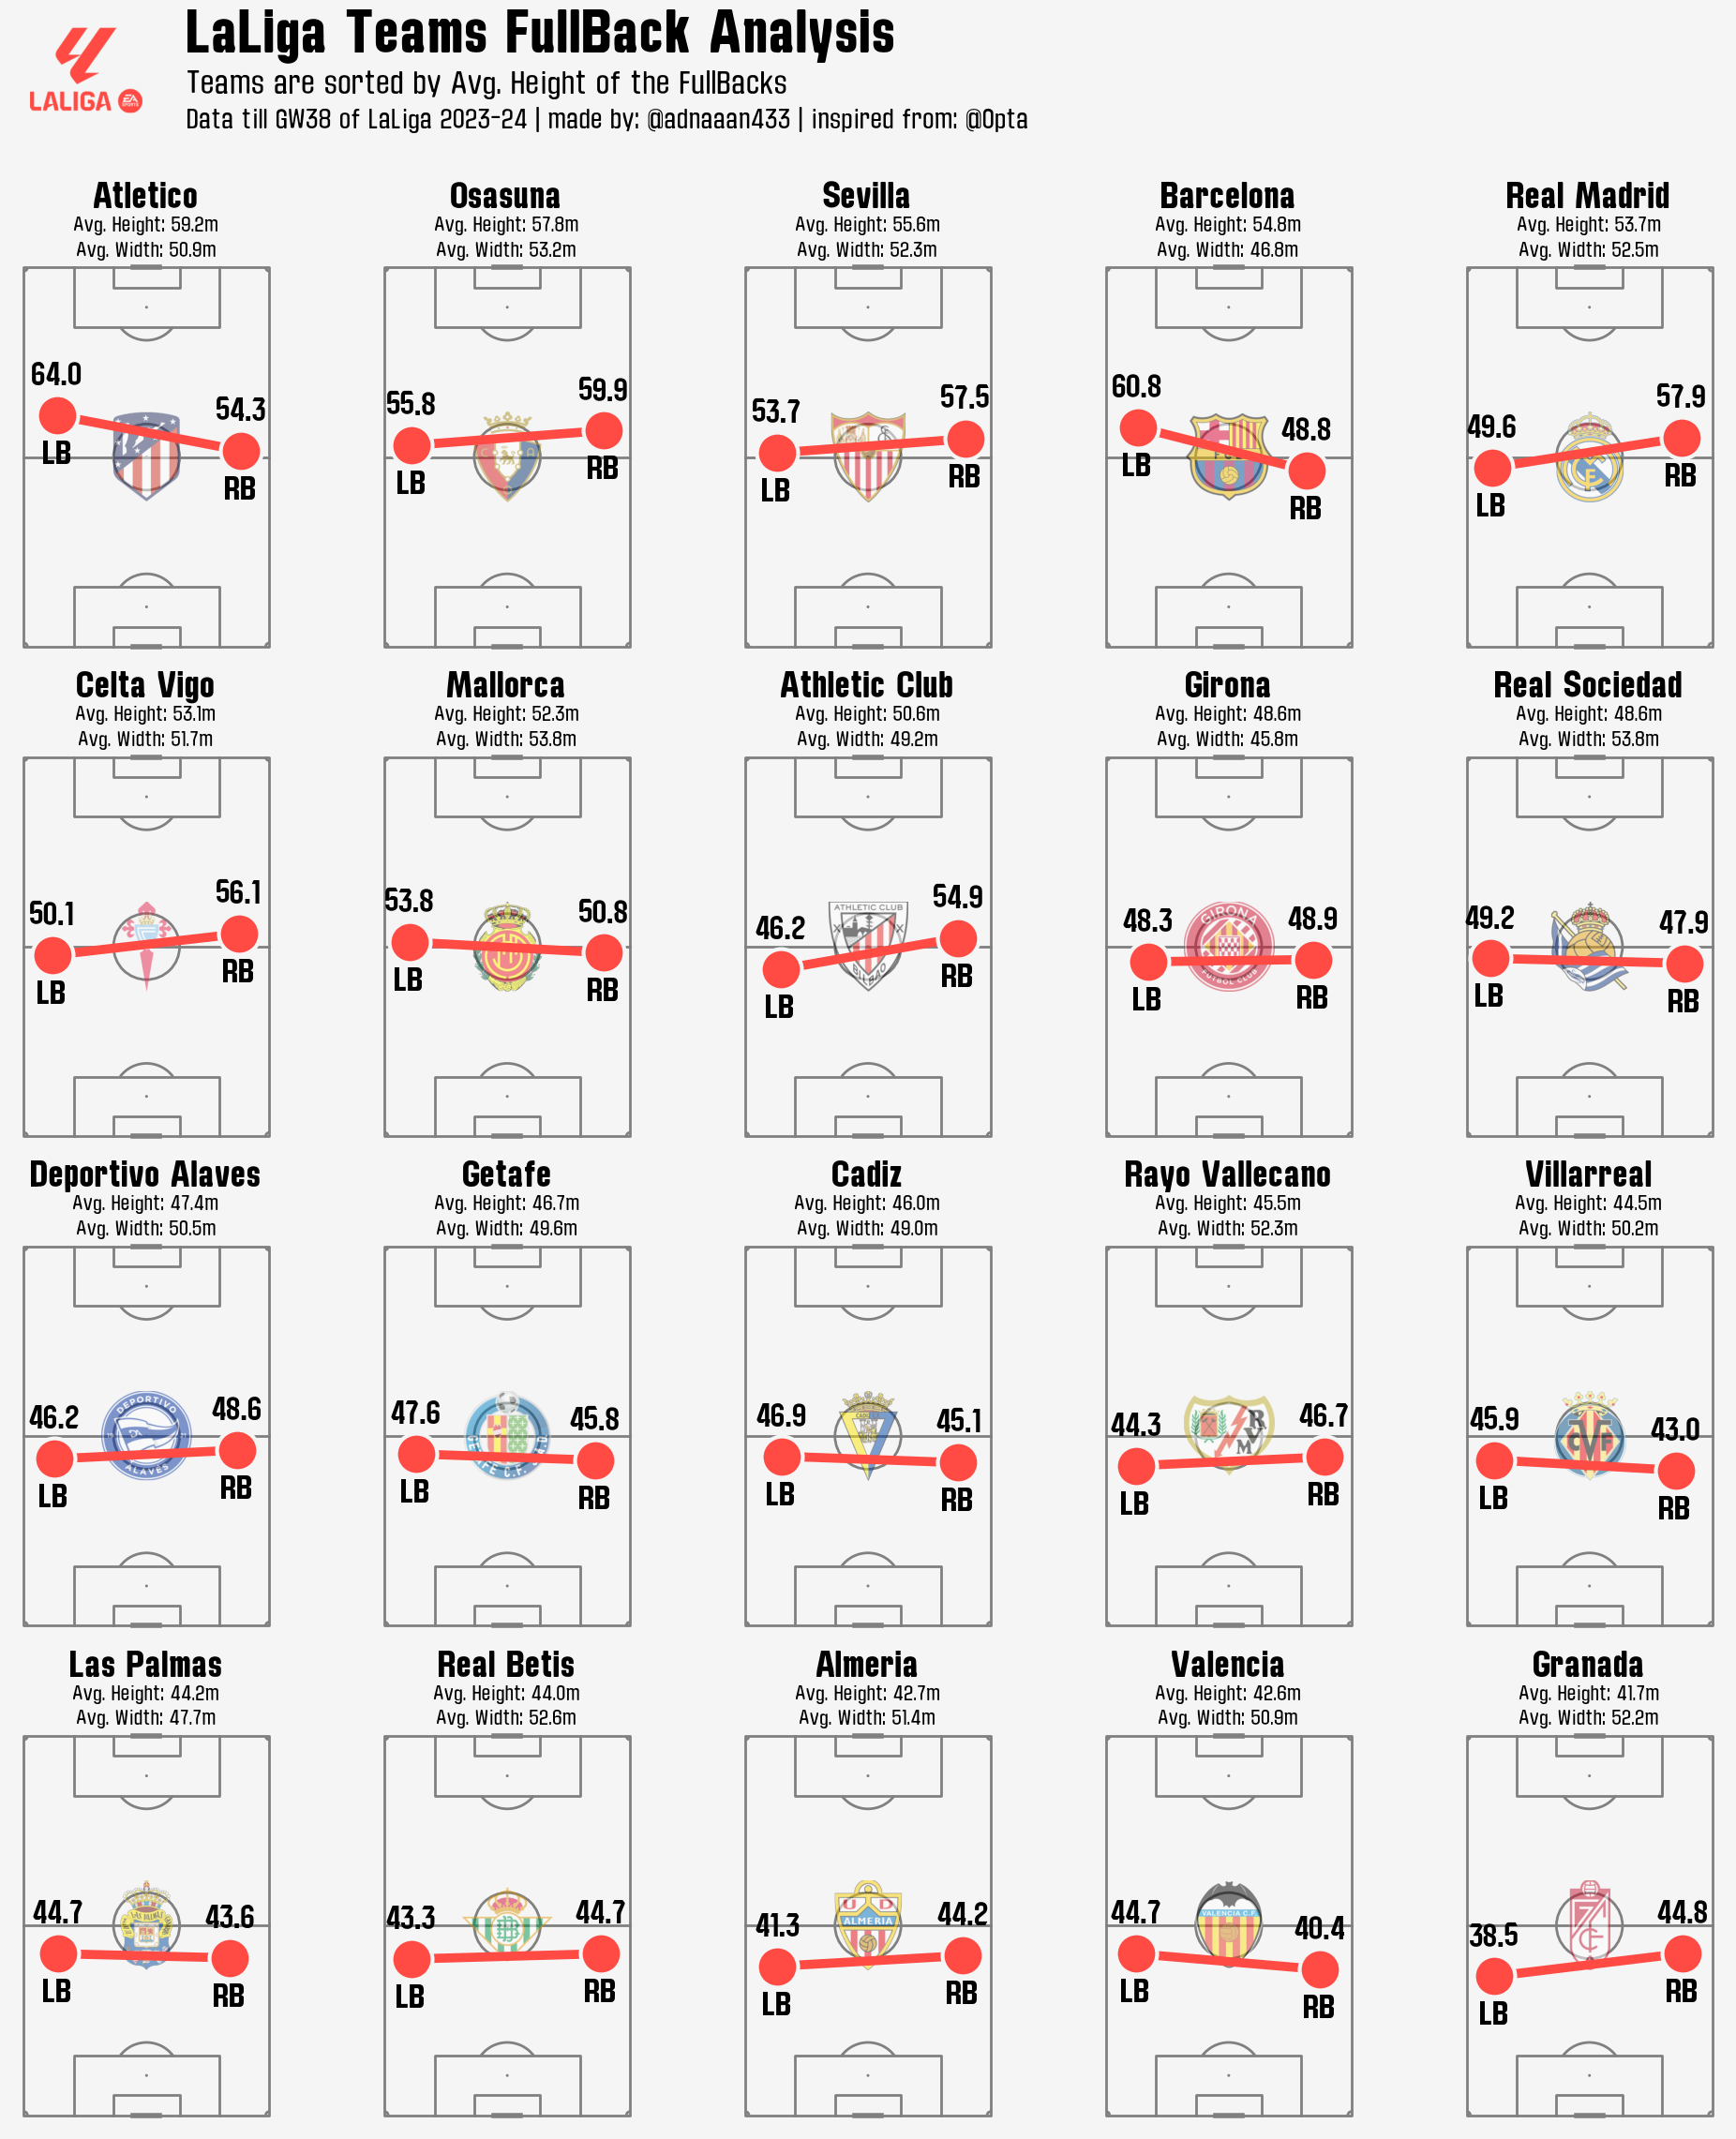

In [77]:
def calculate_avg_h(df, team_name):
    team_df = df[(df['teamName']==team_name) & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
    right = team_df[team_df['position'].isin(['DR', 'DMR'])]
    left = team_df[team_df['position'].isin(['DL', 'DML'])]
    
    avg_hr = right['x'].median()
    avg_hl = left['x'].median()
    avg_h = (avg_hr + avg_hl) / 2
    return avg_h

def plot_fullback(ax, df, team_name, image, avg_h):
    team_df = df[(df['teamName']==team_name) & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
    right = team_df[team_df['position'].isin(['DR', 'DMR'])]
    left = team_df[team_df['position'].isin(['DL', 'DML'])]
    
    avg_hr = right['x'].median()
    avg_hl = left['x'].median()
    avg_wr = right['y'].median()
    avg_wl = left['y'].median()
    dist = avg_wl - avg_wr

    pitch = VerticalPitch(pitch_type='uefa', pitch_color=bg_color, line_color='gray', linewidth=2, corner_arcs=True)
    pitch.draw(ax=ax)
    
    # Plot lines and scatter points for positions
    pitch.lines(avg_hr, avg_wr, avg_hl, avg_wl, color=col1, lw=7, ax=ax)
    pitch.scatter(avg_hr, avg_wr, s=1000, color=col1, edgecolor=bg_color, lw=3, zorder=3, ax=ax)
    pitch.scatter(avg_hl, avg_wl, s=1000, color=col1, edgecolor=bg_color, lw=3, zorder=3, ax=ax)

    # Annotate the plot
    ax.text(avg_wr, avg_hr-7, 'RB', fontsize=20, ha='center', va='top', fontproperties=custom_font)
    ax.text(avg_wl, avg_hl-7, 'LB', fontsize=20, ha='center', va='top', fontproperties=custom_font)
    ax.text(avg_wr, avg_hr+7, f'{avg_hr:.1f}', fontsize=20, ha='center', va='bottom', fontproperties=custom_font)
    ax.text(avg_wl, avg_hl+7, f'{avg_hl:.1f}', fontsize=20, ha='center', va='bottom', fontproperties=custom_font)
    ax.text(34, 114, f'Avg. Height: {avg_h:.1f}m', fontsize=13, ha='center', va='bottom', fontproperties=custom_font_thin)
    ax.text(34, 107, f'Avg. Width: {dist:.1f}m', fontsize=13, ha='center', va='bottom', fontproperties=custom_font_thin)
    ax.text(34, 120, team_name, fontsize=23, fontweight='bold', fontproperties=custom_font, ha='center', va='bottom')

    # Insert preloaded image
    pitch.inset_image(52.5, 34, image, height=25, alpha=0.5, zorder=1, ax=ax)

team_names = df.teamName.unique()

# Preload team logos
team_images = {}
for team_name in team_names:
    IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    team_images[team_name] = Image.open(urlopen(IMAGE_URL))

# Create a DataFrame with team names and their avg_h values
team_avg_h = pd.DataFrame({'teamName': team_names})
team_avg_h['avg_h'] = team_avg_h['teamName'].apply(lambda x: calculate_avg_h(df, x))
team_avg_h_sorted = team_avg_h.sort_values(by='avg_h', ascending=False).reset_index(drop=True)

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(24, 26), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_avg_h_sorted.itertuples()):
    team_name = row.teamName
    avg_h = row.avg_h
    plot_fullback(axes[i], df, team_name, team_images[team_name], avg_h)

font_path = "C:\Fonts\LaLiga2023Bold.otf"
custom_font = FontProperties(fname=font_path)
fig.text(0.21, 0.98, 'LaLiga Teams FullBack Analysis', fontsize=38, fontweight='bold', ha='left', va='top', fontproperties=custom_font)
font_path_thin = "C:\Fonts\LaLiga2023Thin.otf"
custom_font_thin = FontProperties(fname=font_path_thin)
fig.text(0.21, 0.955, "Teams are sorted by Avg. Height of the FullBacks",
         fontsize=20, ha='left', va='top', fontproperties=custom_font_thin)
# fig_text(0.21, 0.94, "<Avg. Offensive Action Height of CenterBacks> | Overall Avg. Position of CneterBacks | <Avg. Defensive Action Height of CenterBacks>",
#          fontsize=17, ha='left', va='top', ax=fig, highlight_textprops=[{'color':col1}, {'color':col2}], fontproperties=custom_font_thin)
fig.text(0.21, 0.94, "Data till GW38 of LaLiga 2023-24 | made by: @adnaaan433 | inspired from: @Opta",
         fontsize=17, ha='left', va='top', fontproperties=custom_font_thin)

image_url = 'file:///D:/FData/Leagues_logos/LaLiga%20.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.14, bottom=0.93, width=0.05, height=0.05)

# CB Def Line

In [12]:
team_df = df[df['teamName'] == 'Celta Vigo']
match_count = team_df['match_id'].unique()

cb_counts_per_match = {}

for match in match_count:
    no_cb = team_df[(team_df['match_id'] == match) & (team_df['position'] == 'DC')]
    no_cb = no_cb['name'].unique()
    cb_counts_per_match[match] = len(no_cb)

# List of CB counts across matches
cb_counts = list(cb_counts_per_match.values())

# Find the mode (most common count of CBs used)
most_common_cb_count = mode(cb_counts)
most_common_cb_count

3

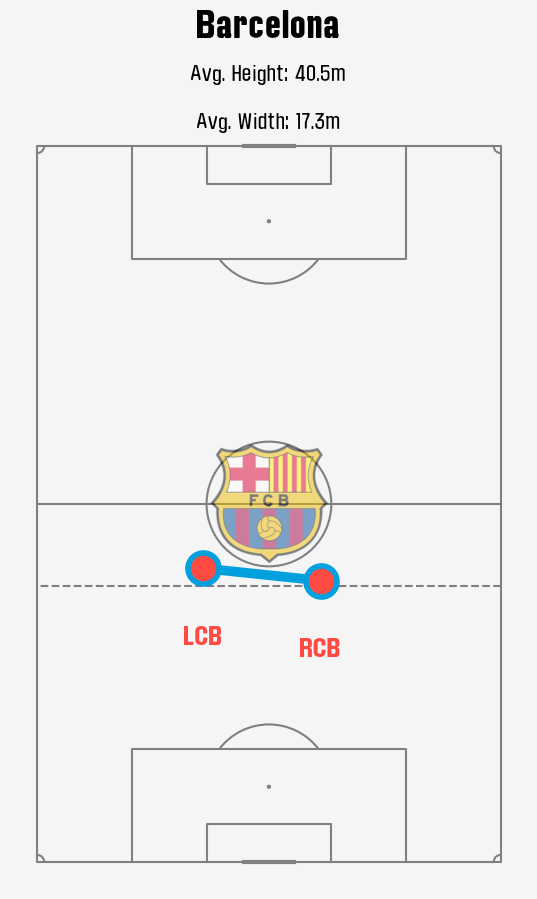

In [7]:
def calculate_avg_x(team_name):
    dfteam = df[df['teamName'] == team_name]
    cb_df = dfteam[(dfteam['position']=='DC') & (dfteam['type'].str.contains('Pass|TakeOn|BallTouch|BallRecovery|Interception|Error|Clearance|Aerial|Challenge|Foul|BlockedPass|Tackle|OffsideProvoked|Save'))]
    avg_x = cb_df['x'].median()
    return avg_x

def backline(ax, team_name):
    team_df = df[df['teamName'] == team_name]
    match_count = team_df['match_id'].unique()

    cb_counts_per_match = {}

    for match in match_count:
        no_cb = team_df[(team_df['match_id'] == match) & (team_df['position'] == 'DC')]
        no_cb = no_cb['name'].unique()
        cb_counts_per_match[match] = len(no_cb)

    # List of CB counts across matches
    cb_counts = list(cb_counts_per_match.values())
    most_common_cb_count = mode(cb_counts)

    if most_common_cb_count == 2:
        dfteam = df[df['teamName'] == team_name]
        cb_df = dfteam[(dfteam['position']=='DC') & (dfteam['type'].str.contains('Pass|TakeOn|BallTouch|BallRecovery|Interception|Error|Clearance|Aerial|Challenge|Foul|BlockedPass|Tackle|OffsideProvoked|Save'))]

        cb_avg = cb_df.groupby('name', as_index=False)[['x', 'y']].median()
        lcb = cb_avg[cb_avg['y']>34]
        rcb = cb_avg[cb_avg['y']<34]
        lcb_avg_y = lcb['y'].median()
        rcb_avg_y = rcb['y'].median()
        lcb_avg_x = lcb['x'].median()
        rcb_avg_x = rcb['x'].median()
        avg_x = cb_df['x'].median()
        avg_width = lcb_avg_y - rcb_avg_y
        pitch = VerticalPitch(pitch_type='uefa', pitch_color=bg_color, line_color='gray', linewidth=1.5, corner_arcs=True)
        pitch.draw(ax=ax)
        
        ax.hlines(avg_x, xmin=0, xmax=68, color='gray', linestyle='--', linewidth=1.5, label='Avg. Position')
        # ax.text(34, avg_x, f'{avg_x:.1f}m', color=bg_color, fontsize=15, fontweight='bold', ha='center', va='center',
        #         bbox=dict(facecolor='k', edgecolor='k', boxstyle='round,pad=0.3'), fontproperties=custom_font)
        ax.scatter(lcb_avg_y, lcb_avg_x, color=col1, edgecolor=col2, zorder=3, linewidth=4, s=500)
        ax.scatter(rcb_avg_y, rcb_avg_x, color=col1, edgecolor=col2, zorder=3, linewidth=4, s=500)
        pitch.lines(lcb_avg_x, lcb_avg_y, rcb_avg_x, rcb_avg_y, color=col2, zorder=2, lw=7, ax=ax)
        ax.text(lcb_avg_y, lcb_avg_x-10, 'LCB', color=col1, fontsize=16, ha='center', va='center', fontproperties=custom_font)
        ax.text(rcb_avg_y, rcb_avg_x-10, 'RCB', color=col1, fontsize=16, ha='center', va='center', fontproperties=custom_font)
        # ax.text(lcb_avg_y, lcb_avg_x+7, f'{lcb_avg_x:.1f}m', rotation=90, color=bg_color, fontsize=16, ha='center', va='bottom',
        #         bbox=dict(facecolor=col1, edgecolor='None', boxstyle='round,pad=0.15'), fontproperties=custom_font)
        # ax.text(rcb_avg_y, rcb_avg_x+7, f'{rcb_avg_x:.1f}m', rotation=90, color=bg_color, fontsize=16, ha='center', va='bottom',
        #         bbox=dict(facecolor=col1, edgecolor='None', boxstyle='round,pad=0.15'), fontproperties=custom_font)
        
        ax.text(34, 114, f'Avg. Height: {avg_x:.1f}m', fontsize=13, ha='center', va='bottom', fontproperties=custom_font_thin)
        ax.text(34, 107, f'Avg. Width: {avg_width:.1f}m', fontsize=13, ha='center', va='bottom', fontproperties=custom_font_thin)
        ax.text(34, 120, team_name, fontsize=23, fontweight='bold', fontproperties=custom_font, ha='center', va='bottom')
        IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
        image = Image.open(urlopen(IMAGE_URL))
        ax_image = pitch.inset_image(52.5, 34, image, height=18, alpha=0.5, ax=ax)

    else:
        dfteam = df[df['teamName'] == team_name]
        cb_df = dfteam[(dfteam['position']=='DC') & (dfteam['type'].str.contains('Pass|TakeOn|BallTouch|BallRecovery|Interception|Error|Clearance|Aerial|Challenge|Foul|BlockedPass|Tackle|OffsideProvoked|Save'))]

        cb_avg = cb_df.groupby('name', as_index=False)[['x', 'y']].median()
        lcb = cb_avg[cb_avg['y']>43]
        mcb = cb_avg[(cb_avg['y']<43) & (cb_avg['y']>25)]
        rcb = cb_avg[cb_avg['y']<25]
        lcb_avg_y = lcb['y'].median()
        rcb_avg_y = rcb['y'].median()
        mcb_avg_y = mcb['y'].median()
        lcb_avg_x = lcb['x'].median()
        rcb_avg_x = rcb['x'].median()
        mcb_avg_x = mcb['x'].median()
        avg_x = cb_df['x'].median()
        avg_width = lcb_avg_y - rcb_avg_y
        pitch = VerticalPitch(pitch_type='uefa', pitch_color=bg_color, line_color='gray', linewidth=1.5, corner_arcs=True)
        pitch.draw(ax=ax)
        
        ax.hlines(avg_x, xmin=0, xmax=68, color='gray', linestyle='--', linewidth=1.5, label='Avg. Position')
        # ax.text(34, avg_x, f'{avg_x:.1f}m', color=bg_color, fontsize=15, fontweight='bold', ha='center', va='center',
        #         bbox=dict(facecolor='k', edgecolor='k', boxstyle='round,pad=0.3'), fontproperties=custom_font)
        ax.scatter(lcb_avg_y, lcb_avg_x, color=col1, edgecolor=col2, zorder=3, linewidth=4, s=500)
        ax.scatter(rcb_avg_y, rcb_avg_x, color=col1, edgecolor=col2, zorder=3, linewidth=4, s=500)
        ax.scatter(mcb_avg_y, mcb_avg_x, color=col1, edgecolor=col2, zorder=3, linewidth=4, s=500)
        pitch.lines(lcb_avg_x, lcb_avg_y, mcb_avg_x, mcb_avg_y, color=col2, zorder=2, lw=7, ax=ax)
        pitch.lines(rcb_avg_x, rcb_avg_y, mcb_avg_x, mcb_avg_y, color=col2, zorder=2, lw=7, ax=ax)
        ax.text(lcb_avg_y, lcb_avg_x-10, 'LCB', color=col1, fontsize=16, ha='center', va='center', fontproperties=custom_font)
        ax.text(rcb_avg_y, rcb_avg_x-10, 'RCB', color=col1, fontsize=16, ha='center', va='center', fontproperties=custom_font)
        ax.text(mcb_avg_y, mcb_avg_x-10, 'CB', color=col1, fontsize=16, ha='center', va='center', fontproperties=custom_font)
        # ax.text(lcb_avg_y, lcb_avg_x+7, f'{lcb_avg_x:.1f}m', rotation=90, color=bg_color, fontsize=16, ha='center', va='bottom',
        #         bbox=dict(facecolor=col1, edgecolor='None', boxstyle='round,pad=0.15'), fontproperties=custom_font)
        # ax.text(rcb_avg_y, rcb_avg_x+7, f'{rcb_avg_x:.1f}m', rotation=90, color=bg_color, fontsize=16, ha='center', va='bottom',
        #         bbox=dict(facecolor=col1, edgecolor='None', boxstyle='round,pad=0.15'), fontproperties=custom_font)
        # ax.text(mcb_avg_y, mcb_avg_x+7, f'{mcb_avg_x:.1f}m', rotation=90, color=bg_color, fontsize=16, ha='center', va='bottom',
        #         bbox=dict(facecolor=col1, edgecolor='None', boxstyle='round,pad=0.15'), fontproperties=custom_font)
        
        ax.text(34, 114, f'Avg. Height: {avg_x:.1f}m', fontsize=13, ha='center', va='bottom', fontproperties=custom_font_thin)
        ax.text(34, 107, f'Avg. Width: {avg_width:.1f}m', fontsize=13, ha='center', va='bottom', fontproperties=custom_font_thin)
        ax.text(34, 120, team_name, fontsize=23, fontweight='bold', fontproperties=custom_font, ha='center', va='bottom')
        IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
        image = Image.open(urlopen(IMAGE_URL))
        ax_image = pitch.inset_image(52.5, 34, image, height=18, alpha=0.5, ax=ax)

fig,ax=plt.subplots(figsize=(10,10), facecolor=bg_color)
backline(ax, 'Barcelona')

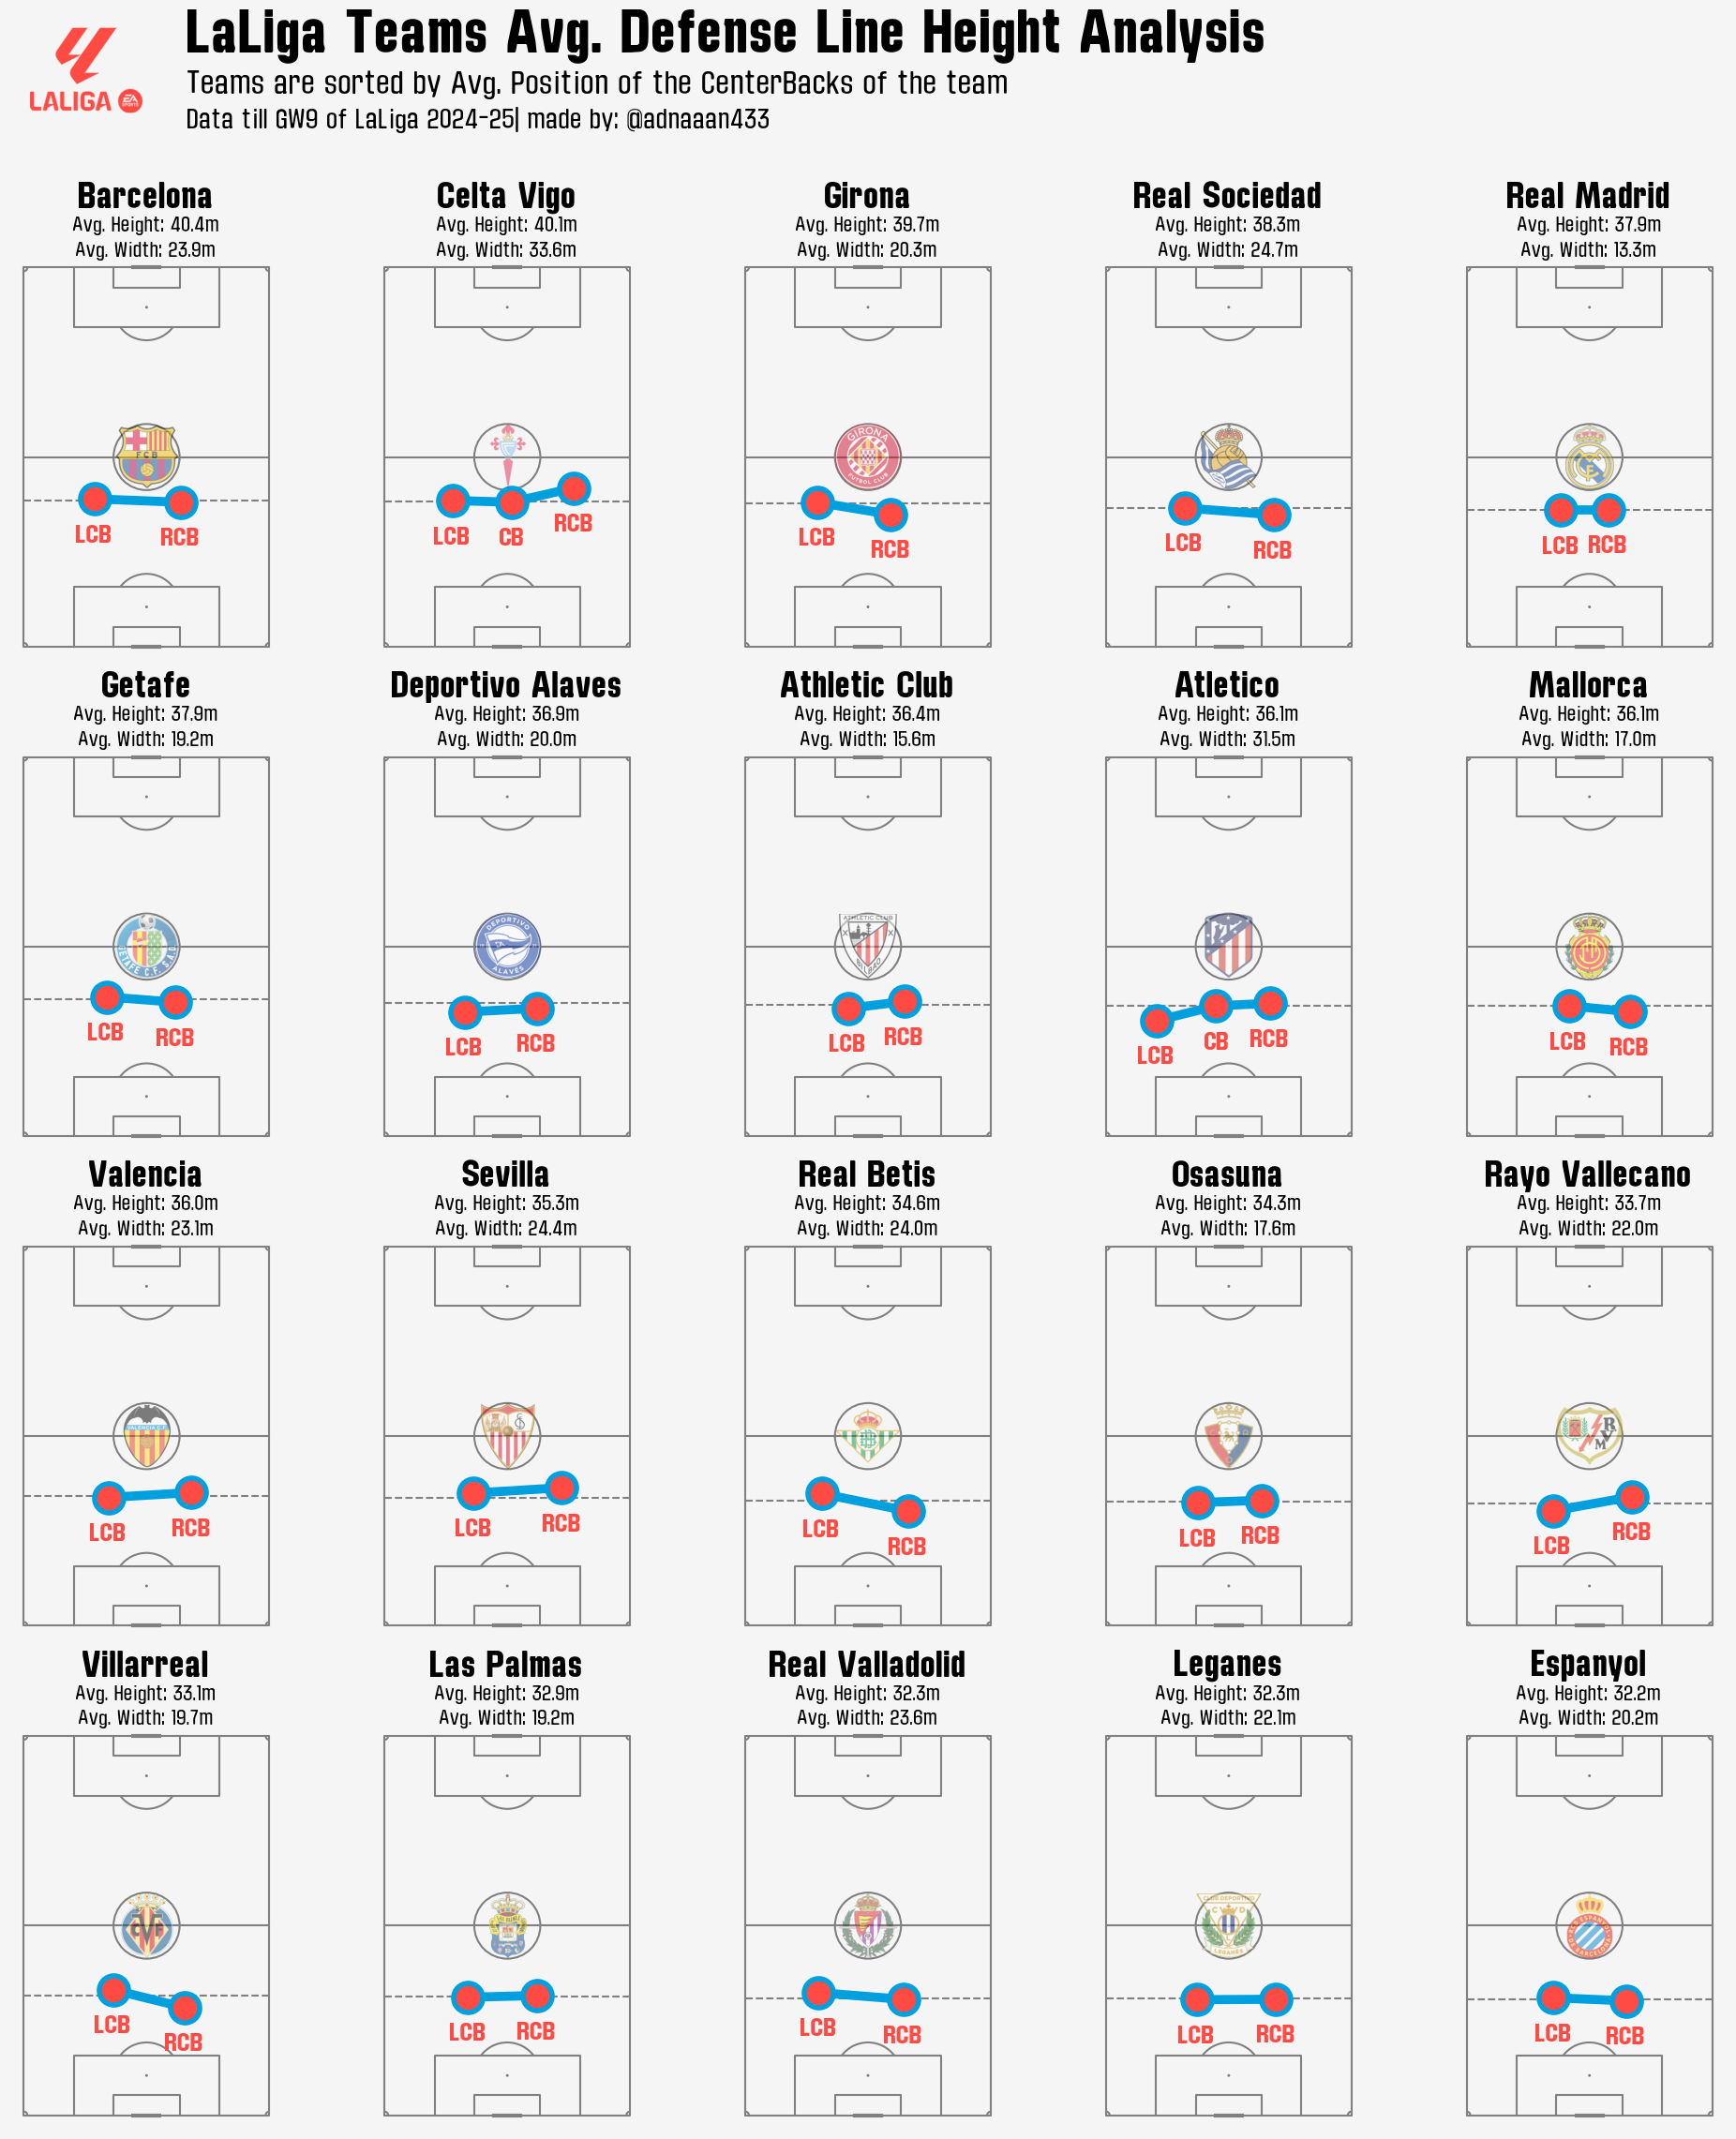

In [5]:
# List of team names
team_names = df.teamName.unique()

# Create a DataFrame with team names and their avg_x values
team_avg_x = pd.DataFrame({'teamName': team_names})
team_avg_x['avg_x'] = team_avg_x['teamName'].apply(calculate_avg_x)

# Sort the teams by avg_x value
team_avg_x_sorted = team_avg_x.sort_values(by='avg_x', ascending=False)

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(24, 26), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_avg_x_sorted.itertuples()):
    team_name = row.teamName
    avg_x = row.avg_x
    backline(axes[i], team_name)

font_path = "C:\Fonts\LaLiga2023Bold.otf"
custom_font = FontProperties(fname=font_path)
fig.text(0.21, 0.98, 'LaLiga Teams Avg. Defense Line Height Analysis', fontsize=38, fontweight='bold', ha='left', va='top', fontproperties=custom_font)
font_path_thin = "C:\Fonts\LaLiga2023Thin.otf"
custom_font_thin = FontProperties(fname=font_path_thin)
fig.text(0.21, 0.955, "Teams are sorted by Avg. Position of the CenterBacks of the team",
         fontsize=20, ha='left', va='top', fontproperties=custom_font_thin)
fig.text(0.21, 0.94, "Data till GW9 of LaLiga 2024-25| made by: @adnaaan433",
         fontsize=17, ha='left', va='top', fontproperties=custom_font_thin)

image_url = 'file:///D:/FData/Leagues_logos/LaLiga%20.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.14, bottom=0.93, width=0.05, height=0.05)

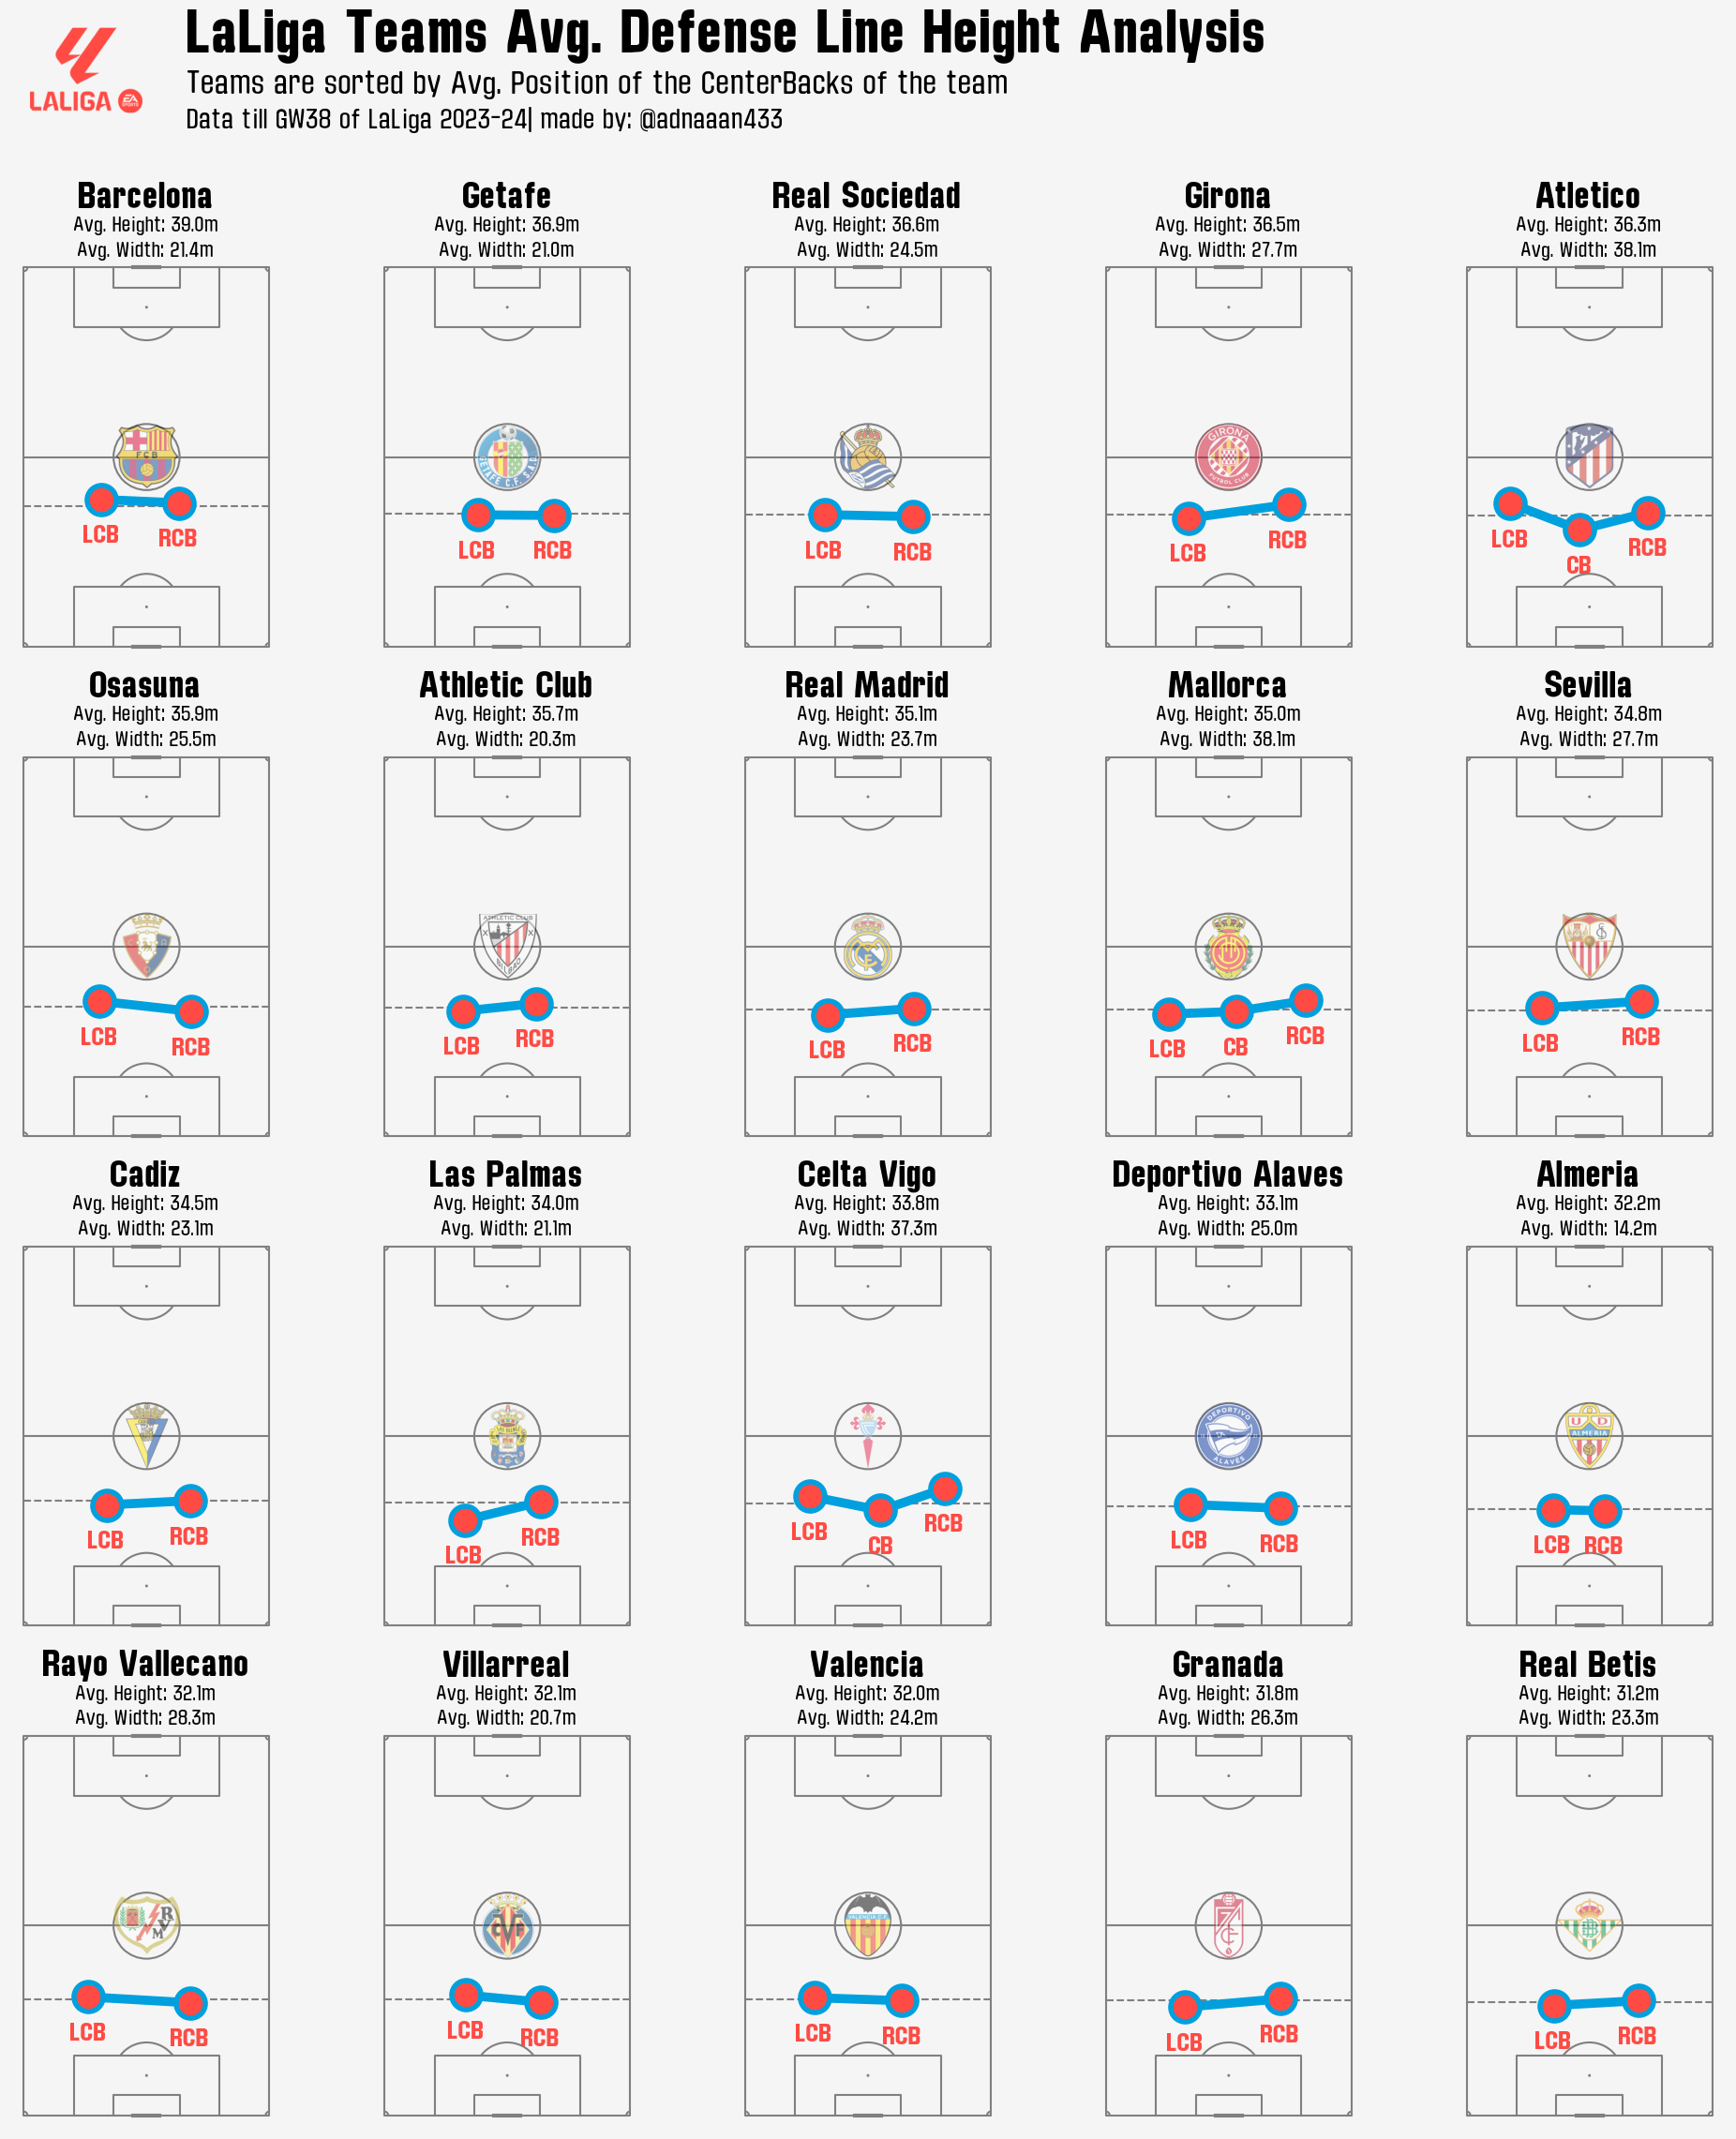

In [15]:
# List of team names
team_names = df.teamName.unique()

# Create a DataFrame with team names and their avg_x values
team_avg_x = pd.DataFrame({'teamName': team_names})
team_avg_x['avg_x'] = team_avg_x['teamName'].apply(calculate_avg_x)

# Sort the teams by avg_x value
team_avg_x_sorted = team_avg_x.sort_values(by='avg_x', ascending=False)

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(24, 26), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_avg_x_sorted.itertuples()):
    team_name = row.teamName
    avg_x = row.avg_x
    backline(axes[i], team_name)

font_path = "C:\Fonts\LaLiga2023Bold.otf"
custom_font = FontProperties(fname=font_path)
fig.text(0.21, 0.98, 'LaLiga Teams Avg. Defense Line Height Analysis', fontsize=38, fontweight='bold', ha='left', va='top', fontproperties=custom_font)
font_path_thin = "C:\Fonts\LaLiga2023Thin.otf"
custom_font_thin = FontProperties(fname=font_path_thin)
fig.text(0.21, 0.955, "Teams are sorted by Avg. Position of the CenterBacks of the team",
         fontsize=20, ha='left', va='top', fontproperties=custom_font_thin)
fig.text(0.21, 0.94, "Data till GW38 of LaLiga 2023-24| made by: @adnaaan433",
         fontsize=17, ha='left', va='top', fontproperties=custom_font_thin)

image_url = 'file:///D:/FData/Leagues_logos/LaLiga%20.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.14, bottom=0.93, width=0.05, height=0.05)

# Full Defense Line

In [4]:
df.teamName.unique()

array(['Athletic Club', 'Atletico', 'Celta Vigo', 'Espanyol', 'Getafe',
       'Real Betis', 'Real Sociedad', 'Sevilla', 'Valencia', 'Villarreal',
       'Deportivo Alaves', 'Girona', 'Las Palmas', 'Leganes',
       'Real Madrid', 'Barcelona', 'Real Valladolid', 'Mallorca',
       'Osasuna', 'Rayo Vallecano'], dtype=object)

In [5]:
def plot_blank(ax):
    pitch = VerticalPitch(pitch_type='uefa', pitch_color=bg_color, line_color=bg_color, linewidth=2, corner_arcs=True)
    pitch.draw(ax=ax)

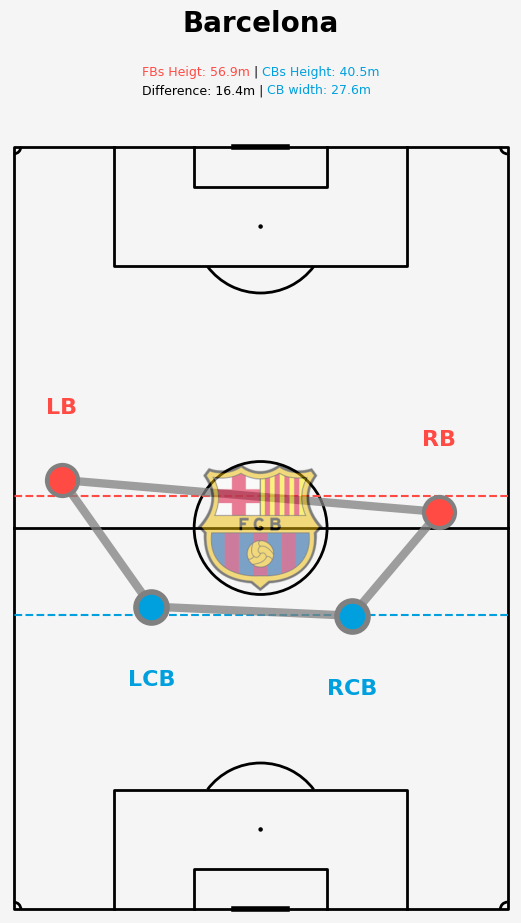

In [29]:
def calculate_diffe(team_name):
    team_df = df[(df['teamName']==team_name) & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
    right = team_df[team_df['position'].isin(['DR', 'DMR'])]
    left = team_df[team_df['position'].isin(['DL', 'DML'])]
    
    avg_hr = right['x'].median()
    avg_hl = left['x'].median()
    avg_fb_h = (avg_hr+avg_hl)/2

    dfteam = df[df['teamName'] == team_name]
    cb_df = dfteam[(dfteam['position']=='DC') & (dfteam['type'].str.contains('Pass|TakeOn|BallTouch|BallRecovery|Interception|Error|Clearance|Aerial|Challenge|Foul|BlockedPass|Tackle|OffsideProvoked|Save'))]
    avg_x = cb_df['x'].median()

    diffe = avg_fb_h-avg_x
    return avg_x

def backline(ax, team_name):
    team_df = df[(df['teamName']==team_name) & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
    right = team_df[team_df['position'].isin(['DR', 'DMR'])]
    left = team_df[team_df['position'].isin(['DL', 'DML'])]
    
    avg_hr = right['x'].median()
    avg_hl = left['x'].median()
    avg_wr = right['y'].median()
    avg_wl = left['y'].median()
    avg_fb_h = (avg_hr+avg_hl)/2
    dist = avg_wl - avg_wr

    pitch = VerticalPitch(pitch_type='uefa', pitch_color=bg_color, line_color=line_color, linewidth=2, corner_arcs=True)
    pitch.draw(ax=ax)
    ax.set_xlim(68.5, -0.5)
    ax.set_ylim(-0.5, 105.5)
    
    # Plot lines and scatter points for positions
    pitch.lines(avg_hr, avg_wr, avg_hl, avg_wl, color='gray', lw=6, alpha=0.75, zorder=3, ax=ax)
    pitch.scatter(avg_hr, avg_wr, s=500, color=col1, edgecolor='gray', lw=3, zorder=3, ax=ax)
    pitch.scatter(avg_hl, avg_wl, s=500, color=col1, edgecolor='gray', lw=3, zorder=3, ax=ax)

    # Annotate the plot
    ax.text(avg_wr, avg_hr+10, 'RB', fontsize=16, fontweight='bold', color=col1, ha='center', va='center')
    ax.text(avg_wl, avg_hl+10, 'LB', fontsize=16, fontweight='bold', color=col1, ha='center', va='center')
    ax.hlines(avg_fb_h, xmin=0, xmax=68, color=col1, linestyle='--', linewidth=1.5, label='Avg. Position')
    
    # IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    # image = Image.open(urlopen(IMAGE_URL))
    # ax_image = pitch.inset_image(52.5, 34, image, height=18, zorder=1, alpha=0.5, ax=ax)

    
    team_df = df[df['teamName'] == team_name]
    match_count = team_df['match_id'].unique()

    cb_counts_per_match = {}

    for match in match_count:
        no_cb = team_df[(team_df['match_id'] == match) & (team_df['position'] == 'DC')]
        no_cb = no_cb['name'].unique()
        cb_counts_per_match[match] = len(no_cb)

    # List of CB counts across matches
    cb_counts = list(cb_counts_per_match.values())
    most_common_cb_count = mode(cb_counts)

    if most_common_cb_count == 2:
        dfteam = df[df['teamName'] == team_name]
        cb_df = dfteam[(dfteam['position']=='DC') & (dfteam['type'].str.contains('Pass|TakeOn|BallTouch|BallRecovery|Interception|Error|Clearance|Aerial|Challenge|Foul|BlockedPass|Tackle|OffsideProvoked|Save'))]

        cb_avg = cb_df.groupby('name', as_index=False)[['x', 'y']].median()
        lcb = cb_avg[cb_avg['y']>34]
        rcb = cb_avg[cb_avg['y']<34]
        lcb_avg_y = lcb['y'].median()
        rcb_avg_y = rcb['y'].median()
        lcb_avg_x = lcb['x'].median()
        rcb_avg_x = rcb['x'].median()
        avg_x = cb_df['x'].median()
        avg_width = lcb_avg_y - rcb_avg_y
        
        ax.hlines(avg_x, xmin=0, xmax=68, color=col2, linestyle='--', linewidth=1.5, label='Avg. Position')
        
        ax.scatter(lcb_avg_y, lcb_avg_x, color=col2, edgecolor='gray', zorder=3, linewidth=4, s=500)
        ax.scatter(rcb_avg_y, rcb_avg_x, color=col2, edgecolor='gray', zorder=3, linewidth=4, s=500)
        pitch.lines(lcb_avg_x, lcb_avg_y, rcb_avg_x, rcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        ax.text(lcb_avg_y, lcb_avg_x-10, 'LCB', color=col2, fontsize=16, fontweight='bold', ha='center', va='center')
        ax.text(rcb_avg_y, rcb_avg_x-10, 'RCB', color=col2, fontsize=16, fontweight='bold', ha='center', va='center')
        
        pitch.lines(avg_hl, avg_wl, lcb_avg_x, lcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        pitch.lines(avg_hr, avg_wr, rcb_avg_x, rcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        
        ax_text(34, 114, f'<FBs Heigt: {avg_fb_h:.1f}m> | <CBs Height: {avg_x:.1f}m>\nDifference: {(avg_fb_h-avg_x):.1f}m | <CB width: {avg_width:.1f}m>', fontsize=9, 
                ha='center', va='center', ax=ax, highlight_textprops=[{'color':col1}, {'color':col2}, {'color':col2}])
        ax.text(34, 120, team_name, fontsize=20, fontweight='bold', ha='center', va='bottom')
        
        IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
        image = Image.open(urlopen(IMAGE_URL))
        ax_image = pitch.inset_image(52.5, 34, image, height=18, alpha=0.5, ax=ax)

    else:
        dfteam = df[df['teamName'] == team_name]
        cb_df = dfteam[(dfteam['position']=='DC') & (dfteam['type'].str.contains('Pass|TakeOn|BallTouch|BallRecovery|Interception|Error|Clearance|Aerial|Challenge|Foul|BlockedPass|Tackle|OffsideProvoked|Save'))]

        cb_avg = cb_df.groupby('name', as_index=False)[['x', 'y']].median()
        lcb = cb_avg[cb_avg['y']>43]
        mcb = cb_avg[(cb_avg['y']<43) & (cb_avg['y']>25)]
        rcb = cb_avg[cb_avg['y']<25]
        lcb_avg_y = lcb['y'].median()
        rcb_avg_y = rcb['y'].median()
        mcb_avg_y = mcb['y'].median()
        lcb_avg_x = lcb['x'].median()
        rcb_avg_x = rcb['x'].median()
        mcb_avg_x = mcb['x'].median()
        avg_x = cb_df['x'].median()
        avg_width = lcb_avg_y - rcb_avg_y
        
        ax.hlines(avg_x, xmin=0, xmax=68, color=col2, linestyle='--', linewidth=1.5, label='Avg. Position')
        
        ax.scatter(lcb_avg_y, lcb_avg_x, color=col2, edgecolor='gray', zorder=3, linewidth=4, s=500)
        ax.scatter(rcb_avg_y, rcb_avg_x, color=col2, edgecolor='gray', zorder=3, linewidth=4, s=500)
        ax.scatter(mcb_avg_y, mcb_avg_x, color=col2, edgecolor='gray', zorder=3, linewidth=4, s=500)
        pitch.lines(lcb_avg_x, lcb_avg_y, mcb_avg_x, mcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        pitch.lines(rcb_avg_x, rcb_avg_y, mcb_avg_x, mcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        ax.text(lcb_avg_y, lcb_avg_x-10, 'LCB', color=col2, fontsize=16, fontweight='bold', ha='center', va='center')
        ax.text(rcb_avg_y, rcb_avg_x-10, 'RCB', color=col2, fontsize=16, fontweight='bold', ha='center', va='center')
        ax.text(mcb_avg_y, mcb_avg_x-10, 'CB', color=col2, fontsize=16, fontweight='bold', ha='center', va='center')
        
        pitch.lines(avg_hl, avg_wl, lcb_avg_x, lcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        pitch.lines(avg_hr, avg_wr, rcb_avg_x, rcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        
        ax_text(34, 114, f'<FBs Heigt: {avg_fb_h:.1f}m> | <CBs Height: {avg_x:.1f}m>\nDifference: {(avg_fb_h-avg_x):.1f}m | <CB width: {avg_width:.1f}m>', fontsize=9, 
                ha='center', va='center', ax=ax, highlight_textprops=[{'color':col1}, {'color':col2}, {'color':col2}])
        ax.text(34, 120, team_name, fontsize=20, fontweight='bold', ha='center', va='bottom')
        
        IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
        image = Image.open(urlopen(IMAGE_URL))
        ax_image = pitch.inset_image(52.5, 34, image, height=18, alpha=0.5, zorder=1, ax=ax)

fig,ax=plt.subplots(figsize=(10,10), facecolor=bg_color)
backline(ax, 'Barcelona')

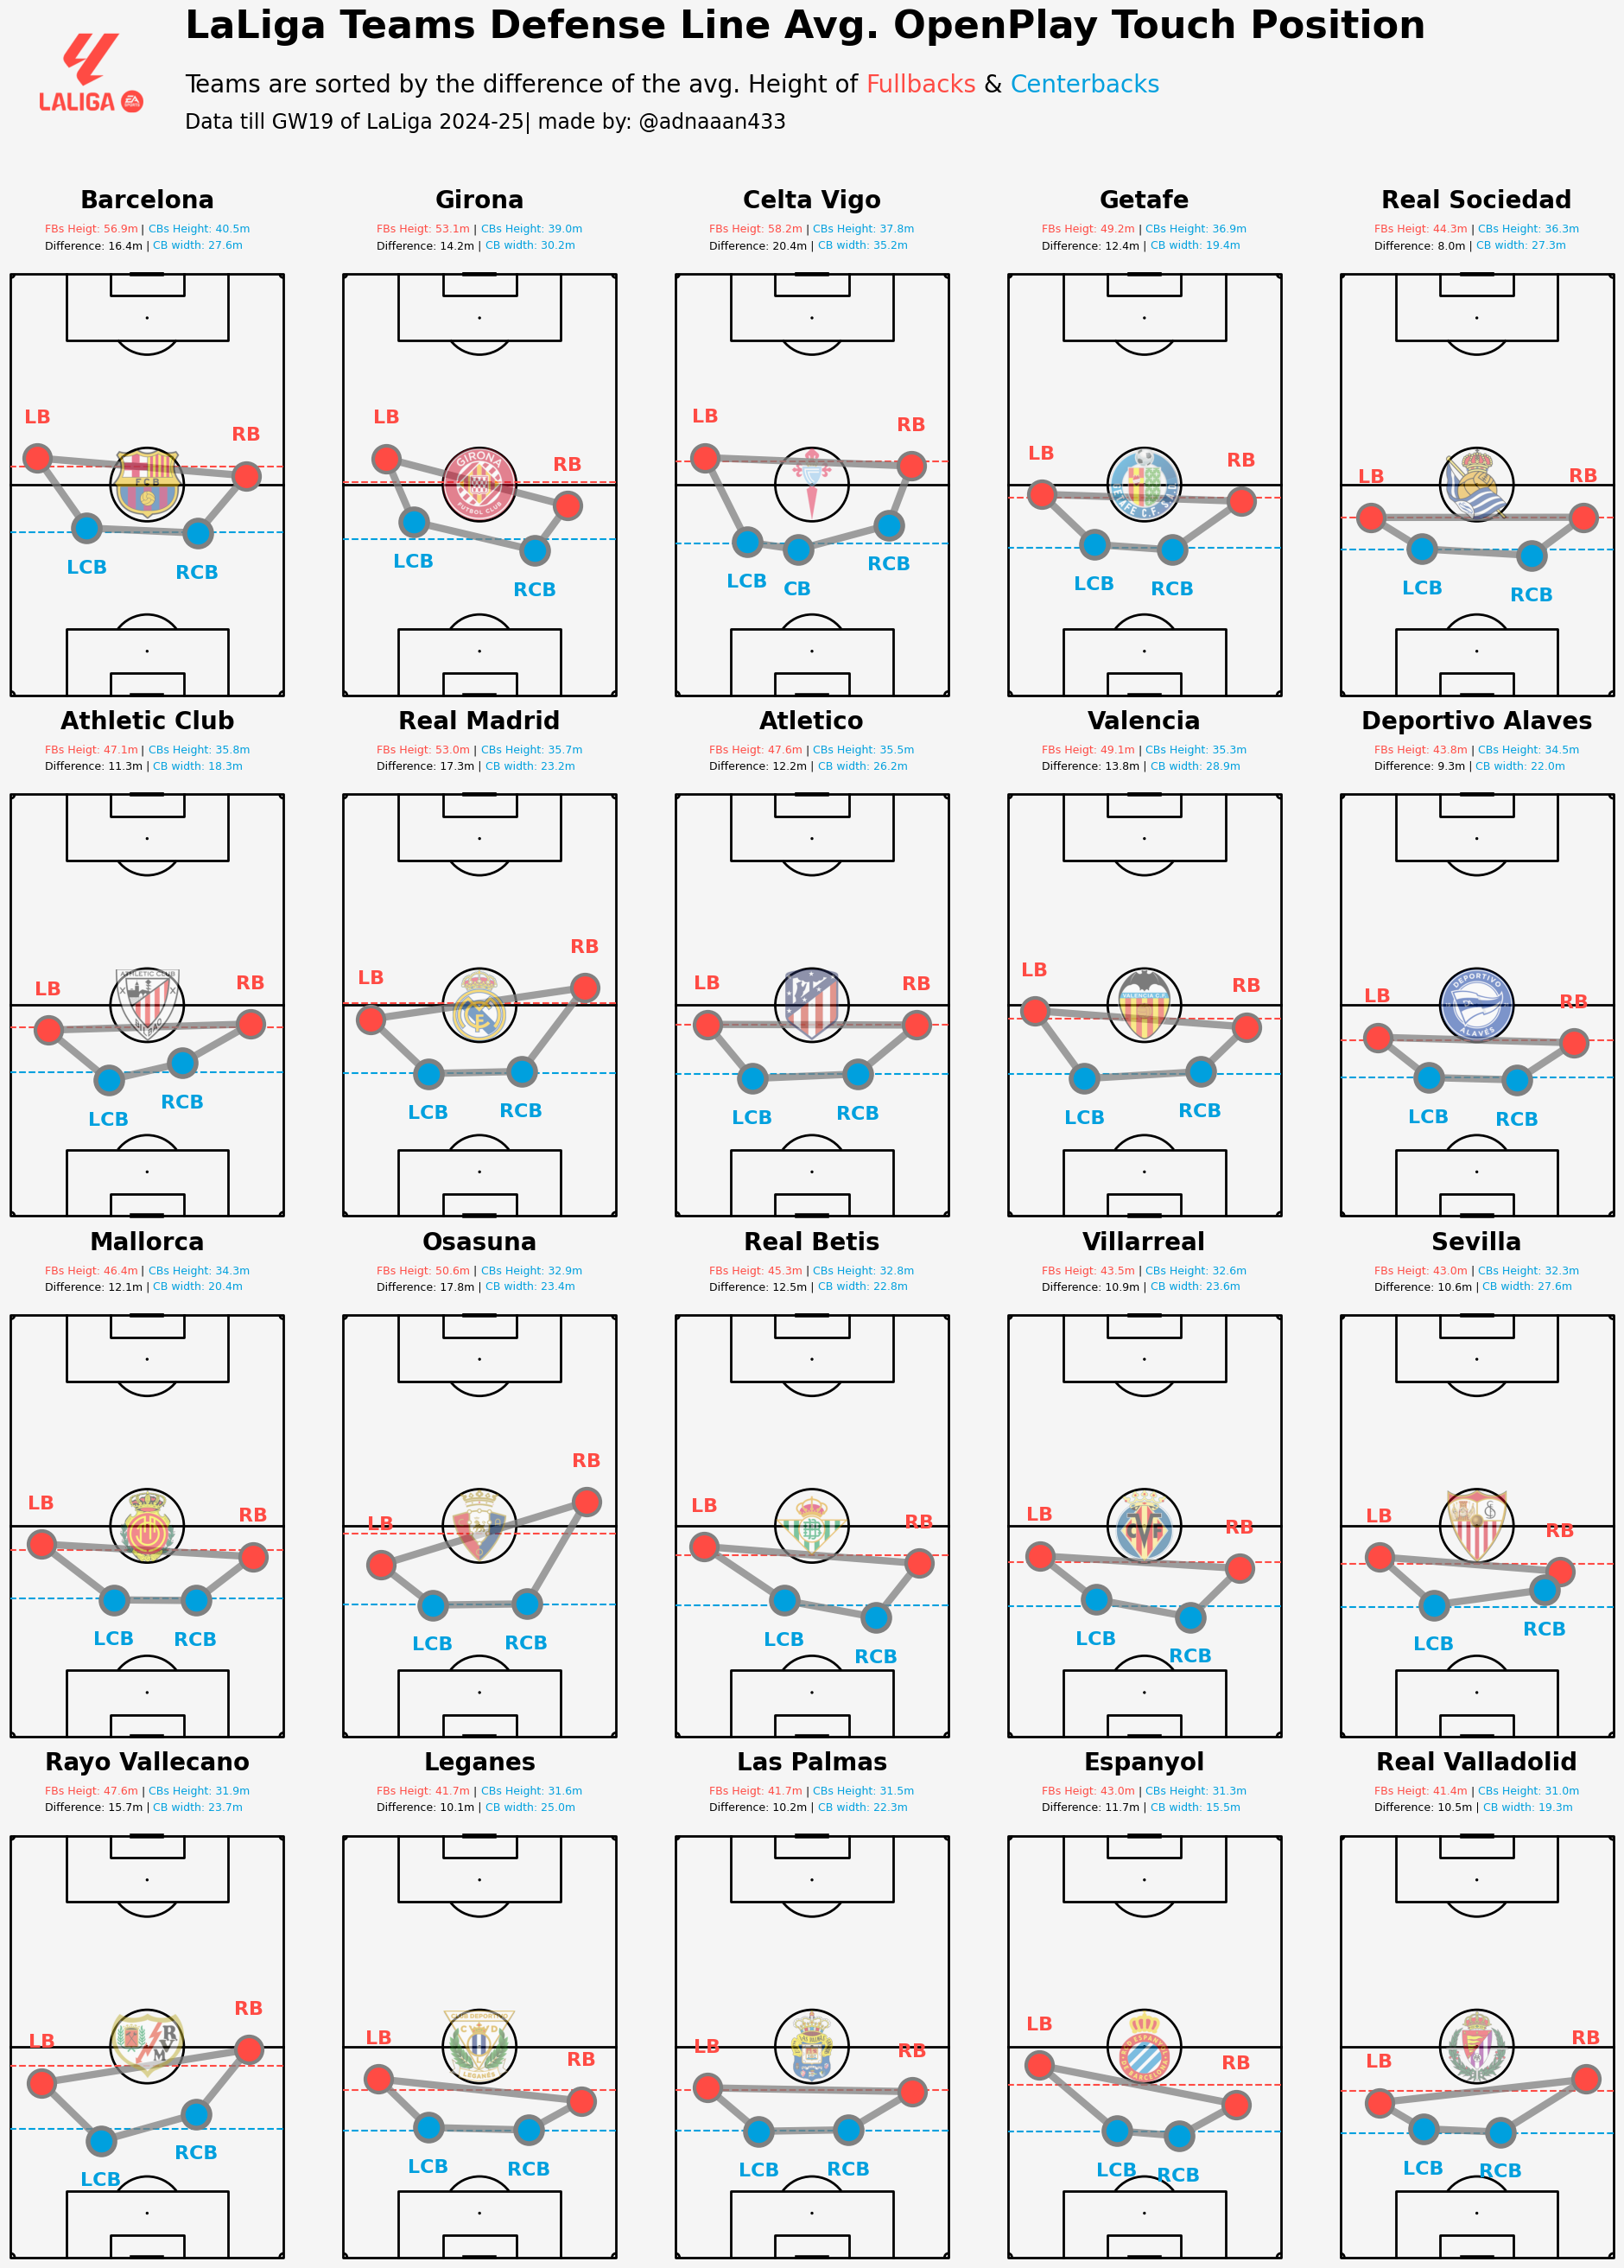

In [30]:
# List of team names
team_names = df.teamName.unique()

# Create a DataFrame with team names and their diffe values
team_diffe = pd.DataFrame({'teamName': team_names})
team_diffe['diffe'] = team_diffe['teamName'].apply(calculate_diffe)

# Sort the teams by diffe value
team_avg_x_sorted = team_diffe.sort_values(by='diffe', ascending=False)

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(24, 30), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_avg_x_sorted.itertuples()):
    team_name = row.teamName
    diffe = row.diffe
    backline(axes[i], team_name)

fig.text(0.21, 0.98, 'LaLiga Teams Defense Line Avg. OpenPlay Touch Position', fontsize=32, fontweight='bold', ha='left', va='top')
fig_text(0.21, 0.955, "Teams are sorted by the difference of the avg. Height of <Fullbacks> & <Centerbacks>",
         fontsize=20, ha='left', va='top', highlight_textprops=[{'color':col1}, {'color':col2}])
fig.text(0.21, 0.94, "Data till GW19 of LaLiga 2024-25| made by: @adnaaan433",
         fontsize=17, ha='left', va='top')
# fig.subplots_adjust(wspace=0.0005)

image_url = 'file:///D:/FData/Leagues_logos/LaLiga%20.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.14, bottom=0.93, width=0.05, height=0.05)

# Selenium Data

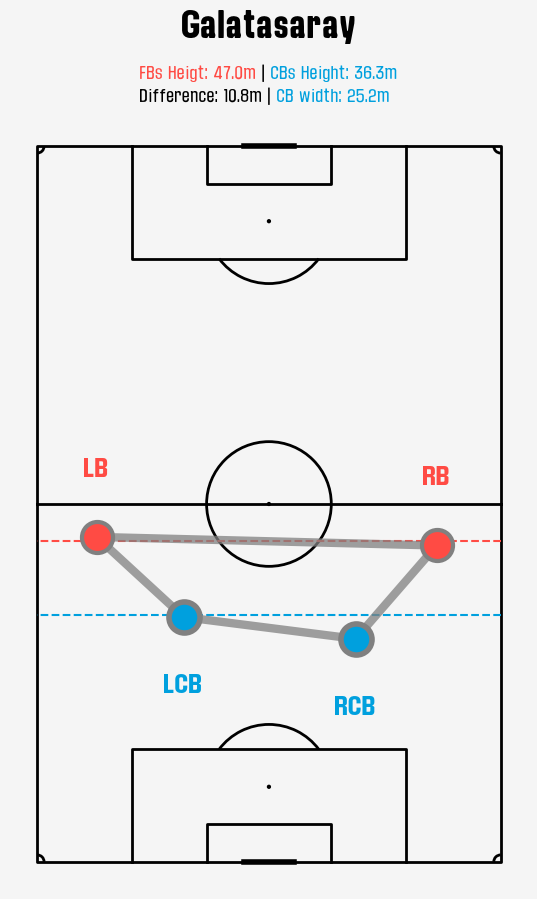

In [8]:
def calculate_diffe(team_name):
    team_df = df[(df['teamName']==team_name) & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
    right = team_df[team_df['position'].isin(['DR', 'DMR'])]
    left = team_df[team_df['position'].isin(['DL', 'DML'])]
    
    avg_hr = right['x'].median()
    avg_hl = left['x'].median()
    avg_fb_h = (avg_hr+avg_hl)/2

    dfteam = df[df['teamName'] == team_name]
    cb_df = dfteam[(dfteam['position']=='DC') & (dfteam['type'].str.contains('Pass|TakeOn|BallTouch|BallRecovery|Interception|Error|Clearance|Aerial|Challenge|Foul|BlockedPass|Tackle|OffsideProvoked|Save'))]
    avg_x = cb_df['x'].median()

    diffe = avg_fb_h-avg_x
    return avg_x

def backline(ax, team_name):
    team_df = df[(df['teamName']==team_name) & (~df['qualifiers'].str.contains('FreeKick|Corner|ThrowIn'))]
    right = team_df[team_df['position'].isin(['DR', 'DMR'])]
    left = team_df[team_df['position'].isin(['DL', 'DML'])]
    
    avg_hr = right['x'].median()
    avg_hl = left['x'].median()
    avg_wr = right['y'].median()
    avg_wl = left['y'].median()
    avg_fb_h = (avg_hr+avg_hl)/2
    dist = avg_wl - avg_wr

    pitch = VerticalPitch(pitch_type='uefa', pitch_color=bg_color, line_color=line_color, linewidth=2, corner_arcs=True)
    pitch.draw(ax=ax)
    
    # Plot lines and scatter points for positions
    pitch.lines(avg_hr, avg_wr, avg_hl, avg_wl, color='gray', lw=6, alpha=0.75, zorder=3, ax=ax)
    pitch.scatter(avg_hr, avg_wr, s=500, color=col1, edgecolor='gray', lw=3, zorder=3, ax=ax)
    pitch.scatter(avg_hl, avg_wl, s=500, color=col1, edgecolor='gray', lw=3, zorder=3, ax=ax)

    # Annotate the plot
    ax.text(avg_wr, avg_hr+10, 'RB', fontsize=16, color=col1, ha='center', va='center', fontproperties=custom_font)
    ax.text(avg_wl, avg_hl+10, 'LB', fontsize=16, color=col1, ha='center', va='center', fontproperties=custom_font)
    ax.hlines(avg_fb_h, xmin=0, xmax=68, color=col1, linestyle='--', linewidth=1.5, label='Avg. Position')
    
    # IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    # image = Image.open(urlopen(IMAGE_URL))
    # ax_image = pitch.inset_image(52.5, 34, image, height=18, zorder=1, alpha=0.5, ax=ax)

    
    team_df = df[df['teamName'] == team_name]
    match_count = team_df['matchId'].unique()

    cb_counts_per_match = {}

    for match in match_count:
        no_cb = team_df[(team_df['matchId'] == match) & (team_df['position'] == 'DC')]
        no_cb = no_cb['playerName'].unique()
        cb_counts_per_match[match] = len(no_cb)

    # List of CB counts across matches
    cb_counts = list(cb_counts_per_match.values())
    most_common_cb_count = mode(cb_counts)

    if most_common_cb_count == 2:
        dfteam = df[df['teamName'] == team_name]
        cb_df = dfteam[(dfteam['position']=='DC') & (dfteam['type'].str.contains('Pass|TakeOn|BallTouch|BallRecovery|Interception|Error|Clearance|Aerial|Challenge|Foul|BlockedPass|Tackle|OffsideProvoked|Save'))]

        cb_avg = cb_df.groupby('playerName', as_index=False)[['x', 'y']].median()
        lcb = cb_avg[cb_avg['y']>34]
        rcb = cb_avg[cb_avg['y']<34]
        lcb_avg_y = lcb['y'].median()
        rcb_avg_y = rcb['y'].median()
        lcb_avg_x = lcb['x'].median()
        rcb_avg_x = rcb['x'].median()
        avg_x = cb_df['x'].median()
        avg_width = lcb_avg_y - rcb_avg_y
        
        ax.hlines(avg_x, xmin=0, xmax=68, color=col2, linestyle='--', linewidth=1.5, label='Avg. Position')
        
        ax.scatter(lcb_avg_y, lcb_avg_x, color=col2, edgecolor='gray', zorder=3, linewidth=4, s=500)
        ax.scatter(rcb_avg_y, rcb_avg_x, color=col2, edgecolor='gray', zorder=3, linewidth=4, s=500)
        pitch.lines(lcb_avg_x, lcb_avg_y, rcb_avg_x, rcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        ax.text(lcb_avg_y, lcb_avg_x-10, 'LCB', color=col2, fontsize=16, ha='center', va='center', fontproperties=custom_font)
        ax.text(rcb_avg_y, rcb_avg_x-10, 'RCB', color=col2, fontsize=16, ha='center', va='center', fontproperties=custom_font)
        
        pitch.lines(avg_hl, avg_wl, lcb_avg_x, lcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        pitch.lines(avg_hr, avg_wr, rcb_avg_x, rcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        
        ax_text(34, 114, f'<FBs Heigt: {avg_fb_h:.1f}m> | <CBs Height: {avg_x:.1f}m>\nDifference: {(avg_fb_h-avg_x):.1f}m | <CB width: {avg_width:.1f}m>', fontsize=11, 
                ha='center', va='center', ax=ax, highlight_textprops=[{'color':col1}, {'color':col2}, {'color':col2}], fontproperties=custom_font_thin)
        ax.text(34, 120, team_name, fontsize=23, fontweight='bold', fontproperties=custom_font, ha='center', va='bottom')
        # IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
        # image = Image.open(urlopen(IMAGE_URL))
        # ax_image = pitch.inset_image(52.5, 34, image, height=18, alpha=0.5, ax=ax)

    else:
        dfteam = df[df['teamName'] == team_name]
        cb_df = dfteam[(dfteam['position']=='DC') & (dfteam['type'].str.contains('Pass|TakeOn|BallTouch|BallRecovery|Interception|Error|Clearance|Aerial|Challenge|Foul|BlockedPass|Tackle|OffsideProvoked|Save'))]

        cb_avg = cb_df.groupby('playerName', as_index=False)[['x', 'y']].median()
        lcb = cb_avg[cb_avg['y']>43]
        mcb = cb_avg[(cb_avg['y']<43) & (cb_avg['y']>25)]
        rcb = cb_avg[cb_avg['y']<25]
        lcb_avg_y = lcb['y'].median()
        rcb_avg_y = rcb['y'].median()
        mcb_avg_y = mcb['y'].median()
        lcb_avg_x = lcb['x'].median()
        rcb_avg_x = rcb['x'].median()
        mcb_avg_x = mcb['x'].median()
        avg_x = cb_df['x'].median()
        avg_width = lcb_avg_y - rcb_avg_y
        
        ax.hlines(avg_x, xmin=0, xmax=68, color=col2, linestyle='--', linewidth=1.5, label='Avg. Position')
        
        ax.scatter(lcb_avg_y, lcb_avg_x, color=col2, edgecolor='gray', zorder=3, linewidth=4, s=500)
        ax.scatter(rcb_avg_y, rcb_avg_x, color=col2, edgecolor='gray', zorder=3, linewidth=4, s=500)
        ax.scatter(mcb_avg_y, mcb_avg_x, color=col2, edgecolor='gray', zorder=3, linewidth=4, s=500)
        pitch.lines(lcb_avg_x, lcb_avg_y, mcb_avg_x, mcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        pitch.lines(rcb_avg_x, rcb_avg_y, mcb_avg_x, mcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        ax.text(lcb_avg_y, lcb_avg_x-10, 'LCB', color=col2, fontsize=16, ha='center', va='center', fontproperties=custom_font)
        ax.text(rcb_avg_y, rcb_avg_x-10, 'RCB', color=col2, fontsize=16, ha='center', va='center', fontproperties=custom_font)
        ax.text(mcb_avg_y, mcb_avg_x-10, 'CB', color=col2, fontsize=16, ha='center', va='center', fontproperties=custom_font)
        
        pitch.lines(avg_hl, avg_wl, lcb_avg_x, lcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        pitch.lines(avg_hr, avg_wr, rcb_avg_x, rcb_avg_y, color='gray', zorder=2, lw=6, alpha=0.75, ax=ax)
        
        ax_text(34, 114, f'<FBs Heigt: {avg_fb_h:.1f}m> | <CBs Height: {avg_x:.1f}m>\nDifference: {(avg_fb_h-avg_x):.1f}m | <CB width: {avg_width:.1f}m>', fontsize=11, 
                ha='center', va='center', ax=ax, highlight_textprops=[{'color':col1}, {'color':col2}, {'color':col2}], fontproperties=custom_font_thin)
        ax.text(34, 120, team_name, fontsize=23, fontweight='bold', fontproperties=custom_font, ha='center', va='bottom')
        # IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
        # image = Image.open(urlopen(IMAGE_URL))
        # ax_image = pitch.inset_image(52.5, 34, image, height=18, alpha=0.5, zorder=1, ax=ax)

fig,ax=plt.subplots(figsize=(10,10), facecolor=bg_color)
backline(ax, 'Galatasaray')

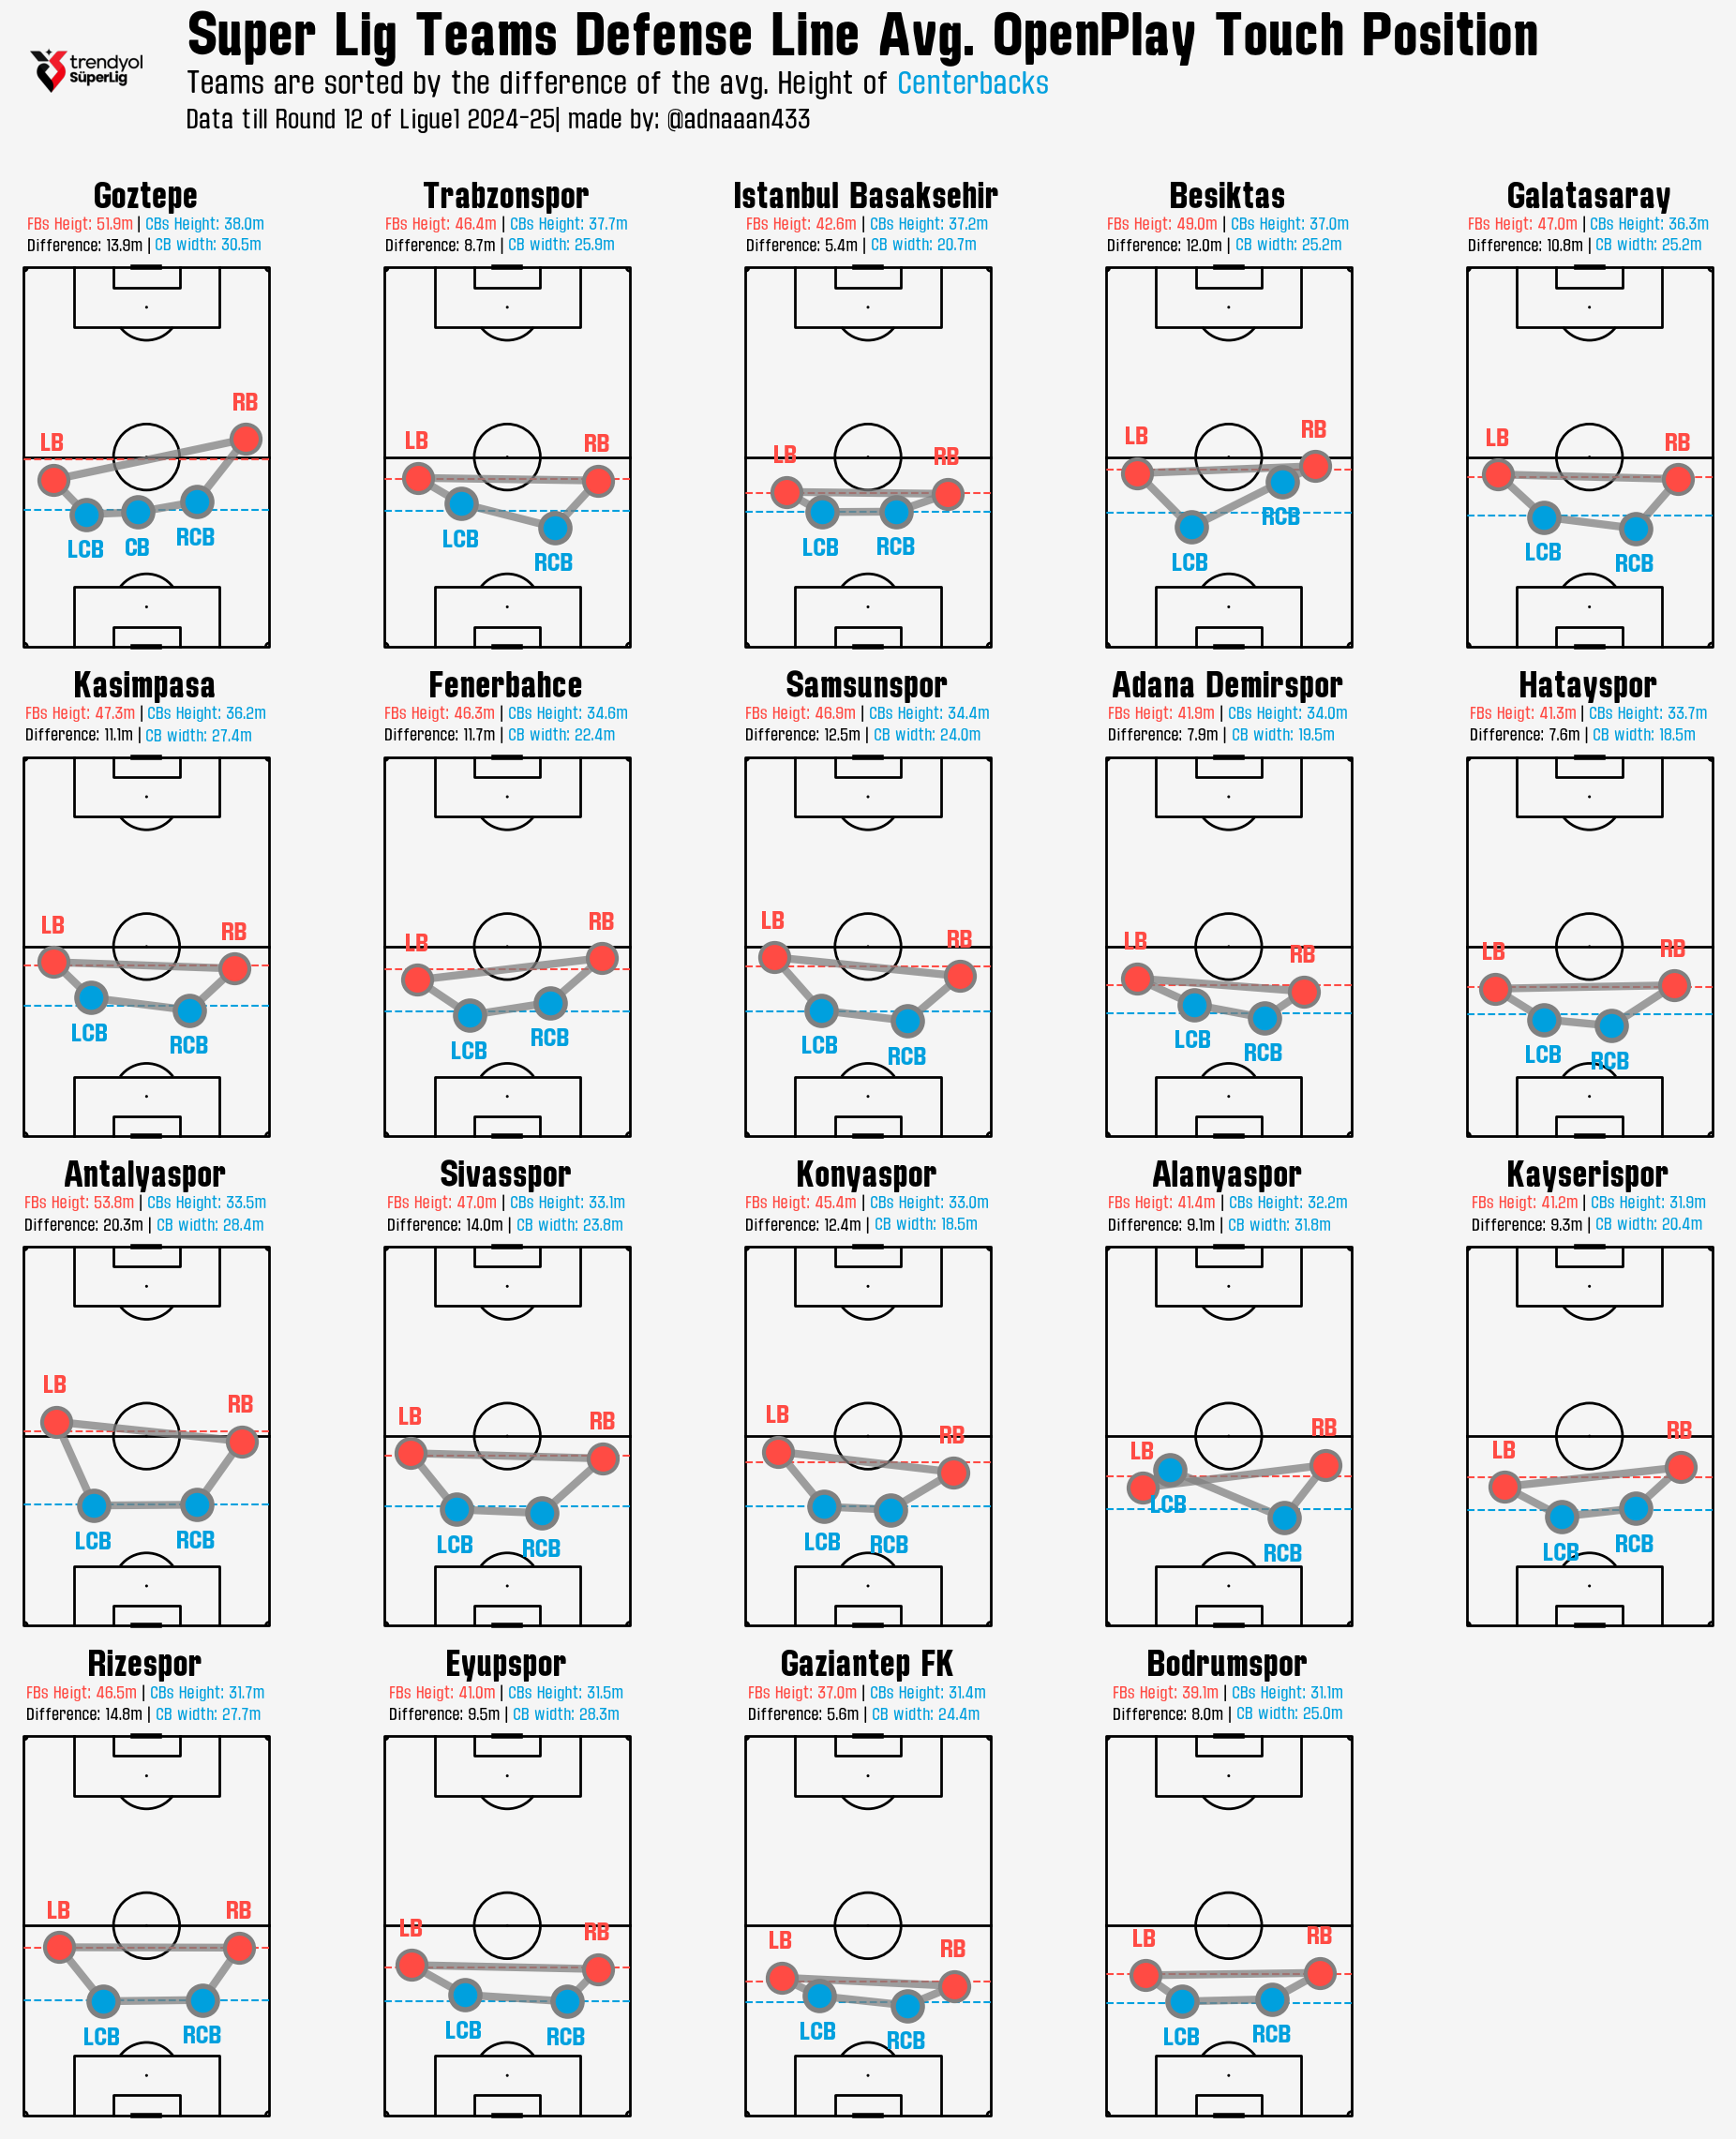

In [9]:
# List of team names
team_names = df.teamName.unique()

# Create a DataFrame with team names and their diffe values
team_diffe = pd.DataFrame({'teamName': team_names})
team_diffe['diffe'] = team_diffe['teamName'].apply(calculate_diffe)

# Sort the teams by diffe value
team_avg_x_sorted = team_diffe.sort_values(by='diffe', ascending=False).reset_index(drop=True)
team_avg_x_sorted = team_avg_x_sorted.dropna()

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(24, 26), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_avg_x_sorted.itertuples()):
    team_name = row.teamName
    diffe = row.diffe
    backline(axes[i], team_name)

# plot_blank(axes[18])
plot_blank(axes[19])

fig.text(0.21, 0.98, 'Super Lig Teams Defense Line Avg. OpenPlay Touch Position', fontsize=38, fontweight='bold', ha='left', va='top', fontproperties=custom_font)
fig_text(0.21, 0.955, "Teams are sorted by the difference of the avg. Height of <Centerbacks>",
         fontsize=20, ha='left', va='top', fontproperties=custom_font_thin, highlight_textprops=[{'color':col2}])
fig.text(0.21, 0.94, "Data till Round 12 of Ligue1 2024-25| made by: @adnaaan433",
         fontsize=17, ha='left', va='top', fontproperties=custom_font_thin)

image_url = 'file:///D:/FData/Leagues_logos/S%C3%BCperLig_Logo.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.14, bottom=0.93, width=0.05, height=0.05)